# <div align="center"> <span style="font-size:larger; font-weight:bold;" > CASE STUDY - LEAD SCORING - LOGISTIC REGRESSION  </span></div>  


## PROBLEM STATEMENT :  
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## STEPS FOLLOWED :


1. Import and Merging Data  
2. Inspecting the Dataframe  
3. Data Cleaning  
4. Data Visualization   
    a. Univariate Analysis   
    b. Bivariate Analysis   
    c. Multivariate Analysis  
5. Data Preparation   
    a. Mapping the Categorical Values   
    b. Dummy Variables Creation   
    c. Outlier Analysis    
6. Train Test Split  
7. Feature Scaling  
8. Model Building  
9. Feature Selection Using RFE  
10. Model Evaluation using the Metrics  
11. Test Prediction  
12. Conclusion 

### Libraries Used:

* ___Pandas___
* ___Numpy___
* ___Seaborn___
* ___Matplotlib___
* ___sklearn___
* ___statsmodel___
* ___random___

# Note : We have NbExtensions enabled in our Notebook and used,worked more to pass values directly in the Markdown Cells

## Importing and Merging Data

___Data___, the most powerful word of the decade.  
We are having a dataset which has about the lead scoring parameters and readily comes with the raw data to solve our business problem

In [1]:
#Importing required Libraries

# For Handling data
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

# For Model Building and Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# For VIF from statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For Random seeds
import random
np.random.seed(100)

# Settings for better visibility
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',30)

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

Once we have imported all the necessary packages in to this notebook, we will load the dataset and try to understand it

In [2]:
# Importing dataset and seeing the glimpse

leads_df = pd.read_csv("Leads.csv",header=0)
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,...,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,...,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,...,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,...,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,...,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Inspecting the Dataframe

Datasets may have any kind of data that will abruptly impact the business in any extreme in any/multi ways  
We need to inspect the DF just loaded in order to use it wisely to get the satisfied outcome

In [3]:
# Lets check the dimensions of the dataframe

print("There are {0} rows and {1} distinct columns in the DF".format(str(leads_df.shape[0]),str(leads_df.shape[1])))

There are 9240 rows and 37 distinct columns in the DF


In [4]:
# Lets look at the statistical aspects of the dataframe

leads_df.describe(percentiles=[.25,.5,.75,.9,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000


From the above descriptive analysis, we could identify that there are only __7__ numerical columns with outliers clearly seen with all columns except _Asymmetrique Profile Score_ and _Converted_

_But Wait!!! The ___Converted___ column should be the categorical value, as it is the targeted variable here. Isn't it ??_ 

In [5]:
# Details of the categorical values

leads_df.select_dtypes('object').describe()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,be4c7a7b-f123-42f2-8868-a005c83a1576,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


There are _30_ categorical columns here in DF from the above cell

In [6]:
# Lets see the type and null count in each column

leads_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

By looking in to the above DataType info, we can say that there are multiple columns with null values have to be handled properly in order to make the model building better

## Data Cleaning

In [7]:
# Extracting the categorical values

categorical_df=leads_df.select_dtypes(include='object')
print("The dimension of the categorical variables in the DF is ",categorical_df.shape)
print("",end='\n')

# Analyzing the data for 'Select'

print("COLUMNS WITH THE OPTION 'Select'")
print("=="*50)
for i in categorical_df.columns:
    j=categorical_df[i].str.contains('Select').sum()
    if j>0:
        print("Column '"+i+"' has '"+str(j)+"' Select values in it")
               
# Replacing the 'Select' value with null in the dataset 

leads_df=leads_df.replace('Select', np.nan)
print("",end='\n')
print("'Select' values in the columns have been replaced with NaN values")

The dimension of the categorical variables in the DF is  (9240, 30)

COLUMNS WITH THE OPTION 'Select'
Column 'Specialization' has '1942' Select values in it
Column 'How did you hear about X Education' has '5043' Select values in it
Column 'Lead Profile' has '4146' Select values in it
Column 'City' has '2249' Select values in it

'Select' values in the columns have been replaced with NaN values


In [8]:
# Function to return the Percentage and Total Missing data by Column

def MissingDataFinder(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percentage], axis=1, keys=['Total Null Values', 'Percentage of Null Values'])

In [9]:
# Passing the DF to the function in order to find the missing values percentage

Leads_missing = MissingDataFinder(leads_df)
print('The Percentage of missing values per column in the DF')
print('**'*50)
Leads_missing[(Leads_missing['Percentage of Null Values']>0)]

The Percentage of missing values per column in the DF
****************************************************************************************************


,Total Null Values,Percentage of Null Values
How did you hear about X Education,7250,78.463203
Lead Profile,6855,74.188312
Lead Quality,4767,51.590909
Asymmetrique Profile Score,4218,45.649351
Asymmetrique Activity Score,4218,45.649351
Asymmetrique Profile Index,4218,45.649351
Asymmetrique Activity Index,4218,45.649351
City,3669,39.707792
Specialization,3380,36.580087
Tags,3353,36.287879


In [10]:
# Passing the DF to the function in order to find the missing values percentage more than 40%

Leads_missing = MissingDataFinder(leads_df)
print('The Columns which are having more than 40 % missing values in the DF')
print('**'*50)
Leads_missing[(Leads_missing['Percentage of Null Values']>40)]

The Columns which are having more than 40 % missing values in the DF
****************************************************************************************************


,Total Null Values,Percentage of Null Values
How did you hear about X Education,7250,78.463203
Lead Profile,6855,74.188312
Lead Quality,4767,51.590909
Asymmetrique Profile Score,4218,45.649351
Asymmetrique Activity Score,4218,45.649351
Asymmetrique Profile Index,4218,45.649351
Asymmetrique Activity Index,4218,45.649351


___Lead Number___ and ___Prospect ID___ are identification IDs and they are unique, due to assign a lead score to each of the leads we are not removing it now


Columns that are unnecessary for model building must be dropped in order to get the better model    
___Lead Profile___ and ___Lead Quality___ are created based on the lead data   
These column are not important in the model building we can omit those from model building  

In [11]:
# Creating an empty list to have the unnecessary columns to get dropped

columns_to_drop=[]

#Adding the columns to the drop list, let us drop the columns which got more than 50% of Null/NaN values

columns_to_drop.extend(Leads_missing[(Leads_missing['Percentage of Null Values']>50)].index.values)

From the above Missing values percentage data we can see that the columns such as ___Asymmetrique Profile Score, Asymmetrique Activity Score, Asymmetrique Profile Index___ and ___Asymmetrique Activity Index___ have more than 45% Missing values. 

Also by looking at the data dictionary we could see that these 4 columns are derived using Profile and Activity columns. Because they are derived fields, the correlation between these columns and source fields Profile and Activity will be higher (Multicollinearity).     
To get rid off this, it is better to drop these 4 columns.

In [12]:
# Adding the columns to the drop list, let us drop the columns which got more than 45% of Null/NaN values

columns_to_drop.extend(Leads_missing[(Leads_missing['Percentage of Null Values']>45) & (Leads_missing['Percentage of Null Values']<50)].index.values)

In [13]:
# Lets inspect the City column in the DF

print(Leads_missing[(Leads_missing.index=='City')] ) 

print("=="*50)
print("\n")
print("Column 'City' has the following values overall")
print("=="*50)
print(leads_df['City'].value_counts())

      Total Null Values  Percentage of Null Values
City               3669                  39.707792


Column 'City' has the following values overall
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


City column has ___39.7%___ of Missing value and remaining ___60.3%___ of values are ___Mumbai , Thane and others cities___  
Looking at the data it is very clear that almost all the rows contains information about Mumbai or Cities of Maharashtra state. This field will not be useful in identifying Potential Leads. So we will drop this column.

In [14]:
# Lets inspect the Country column in the DF

print(Leads_missing[(Leads_missing.index=='Country')] ) 

print("=="*50)
print("\n")
print("Column 'Country' has the following values overall")
print("=="*50)
print(leads_df['Country'].value_counts())

         Total Null Values  Percentage of Null Values
Country               2461                  26.634199


Column 'Country' has the following values overall
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Nigeria                    4
South Africa               4
Germany                    4
Canada                     4
Sweden                     3
Belgium                    2
Uganda                     2
Bangladesh                 2
Italy                      2
Asia/Pacific Region        2
Netherlands                2
China                      2
Ghana                      2
Philippines                2
Indonesia                  1

Country column has ___26.6%___ of Missing value and in the remaining ___73.4%___ of data, ___70%___ of data is 'India' and only ___3.4%___ of data related to Other Country information.  
This field will not be useful in identifying Potential Leads. So we will drop this column.

In [15]:
# Adding the two columns in the list to drop them

columns_to_drop.extend(['City','Country'])

In [16]:
# Lets inspect the Specialization column in the DF

print(Leads_missing[(Leads_missing.index=='Specialization')] ) 

print("=="*50)
print("\n")
print("Column 'Specialization' has the following values overall")
print("=="*50)
print(leads_df['Specialization'].value_counts())

                Total Null Values  Percentage of Null Values
Specialization               3380                  36.580087


Column 'Specialization' has the following values overall
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64


We could see that the Specialization Category column with ___36.5%___ missing values, it is sensible to impute those null values with new derived value as ___Not Specified___

In [17]:
# Imputing Specilization missing column

leads_df.loc[:,'Specialization'].fillna('Not Specified',inplace=True)

In [18]:
# Lets inspect the Tags column in the DF

print(Leads_missing[(Leads_missing.index=='Tags')] ) 

print("=="*50)
print("\n")
print("Column 'Tags' has the following values overall")
print("=="*50)
print(leads_df['Tags'].value_counts())

      Total Null Values  Percentage of Null Values
Tags               3353                  36.287879


Column 'Tags' has the following values overall
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                           

We could see that the Tags Category column with ___36.3%___ missing values, it is sensible to impute those null values with new derived value as ___Not Specified___

In [19]:
# Imputing 'Tags' missing column

leads_df.loc[:,'Tags'].fillna('Not Specified',inplace=True)

In [20]:
# Lets inspect the 'What is your current occupation' column in the DF

print(Leads_missing[(Leads_missing.index=='What is your current occupation')] ) 

print("=="*50)
print("\n")
print("Column 'What is your current occupation' has the following values overall")
print("=="*50)
print(leads_df['What is your current occupation'].value_counts())

                                 Total Null Values  Percentage of Null Values
What is your current occupation               2690                  29.112554


Column 'What is your current occupation' has the following values overall
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


We could see that the _What is your current occupation_ Category column with ___29.1%___ missing values, it is sensible to impute those null values with new derived value as ___Not Specified___

In [21]:
# Imputing 'What is your current occupation' missing column

leads_df.loc[:,'What is your current occupation'].fillna('Not Specified',inplace=True)

In [22]:
# lets visualize the frequencies of the below categorical columns

categorical_variables_list = ['What matters most to you in choosing a course','Do Not Call','Search','Magazine','Newspaper Article',
          'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
          'Receive More Updates About Our Courses','Update me on Supply Chain Content',
          'Get updates on DM Content','I agree to pay the amount through cheque']

leads_df[categorical_variables_list].describe()

,What matters most to you in choosing a course,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque
count,6531,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,3,2,2,1,2,2,2,2,2,1,1,1,1
top,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No
freq,6528,9238,9226,9240,9238,9239,9239,9236,9233,9240,9240,9240,9240



___What matters most to you in choosing a course'___: For this column ___99%___ of value is ___Better Career Prospects___ and remaining null values. Hence we drop this column as it won't be useful in identifying the potential leads.
 
For the Below columns ___99%___ of value is ___No___. It is better drop to these column as these fields won't be useful in identifying the potential leads.

* ___Do Not Call___
* ___Search___
* ___Magazine___
* ___Newspaper Article___
* ___X Education Forums___
* ___Newspaper___
* ___Digital Advertisement___
* ___Through Recommendations___
* ___Receive More Updates About Our Courses___
* ___Update me on Supply Chain Content___
* ___Get updates on DM Content___
* ___I agree to pay the amount through cheque___


In [23]:
# Adding the variables to be dropped in to the list

columns_to_drop.extend(categorical_variables_list)

Before dropping the columns, lets see the count of null values along with the percentages once again

In [24]:
# Passing the DF in the function

MissingDataFinder(leads_df)

,Total Null Values,Percentage of Null Values
How did you hear about X Education,7250,78.463203
Lead Profile,6855,74.188312
Lead Quality,4767,51.590909
Asymmetrique Profile Score,4218,45.649351
Asymmetrique Activity Score,4218,45.649351
Asymmetrique Profile Index,4218,45.649351
Asymmetrique Activity Index,4218,45.649351
City,3669,39.707792
What matters most to you in choosing a course,2709,29.318182
Country,2461,26.634199


In [25]:
# Dropping the columns added in the list

leads_df.drop(columns_to_drop,inplace=True,axis=1)

After dropping the columns, lets see the count of null values along with the percentages once again

In [26]:
# Passing the DF in the function

MissingDataFinder(leads_df)

,Total Null Values,Percentage of Null Values
Page Views Per Visit,137,1.482684
TotalVisits,137,1.482684
Last Activity,103,1.114719
Lead Source,36,0.389610
Last Notable Activity,0,0.000000
A free copy of Mastering The Interview,0,0.000000
Tags,0,0.000000
What is your current occupation,0,0.000000
Specialization,0,0.000000
Total Time Spent on Website,0,0.000000


Lets inspect the ___TotalVisits___ and ___Lead Source___ columns to decide what to do with the null values in those columns

In [27]:
# Drop the null value rows in the column 'TotalVisits'

leads_df = leads_df[~pd.isnull(leads_df['TotalVisits'])]

In [28]:
# Passing the DF in the function

MissingDataFinder(leads_df)

,Total Null Values,Percentage of Null Values
Lead Source,29,0.318576
Last Notable Activity,0,0.000000
A free copy of Mastering The Interview,0,0.000000
Tags,0,0.000000
What is your current occupation,0,0.000000
Specialization,0,0.000000
Last Activity,0,0.000000
Page Views Per Visit,0,0.000000
Total Time Spent on Website,0,0.000000
TotalVisits,0,0.000000


In [29]:
# Drop the null value rows in the column 'Lead Source'

leads_df = leads_df[~pd.isnull(leads_df['Lead Source'])]

In [30]:
# Passing the DF in the function

MissingDataFinder(leads_df)

,Total Null Values,Percentage of Null Values
Last Notable Activity,0,0.0
A free copy of Mastering The Interview,0,0.0
Tags,0,0.0
What is your current occupation,0,0.0
Specialization,0,0.0
Last Activity,0,0.0
Page Views Per Visit,0,0.0
Total Time Spent on Website,0,0.0
TotalVisits,0,0.0
Converted,0,0.0


_Perfect !!_ We can proceed and start visualizing the DF in order to find insights from the same  
Now we will see the shape of the processed data from the DF

In [31]:
# Lets see the dimension once again

print("There are {0} rows and {1} columns in the final dataset we obtained".format(str(leads_df.shape[0]),str(leads_df.shape[1])))

There are 9074 rows and 15 columns in the final dataset we obtained


## Data Visualization

As far as any data is concerned, it is mandatory to have a overview of how the data trends. For doing so, visualizing is one of the best way to go.  

Here we will use the necessary steps to visualize and understand the relationships between the columns

### Univariate Analysis

#### Continuous Variables

As a part of Data Visualization, we will now see the individual elements given in the DF. Histograms will show us the data distributed across.

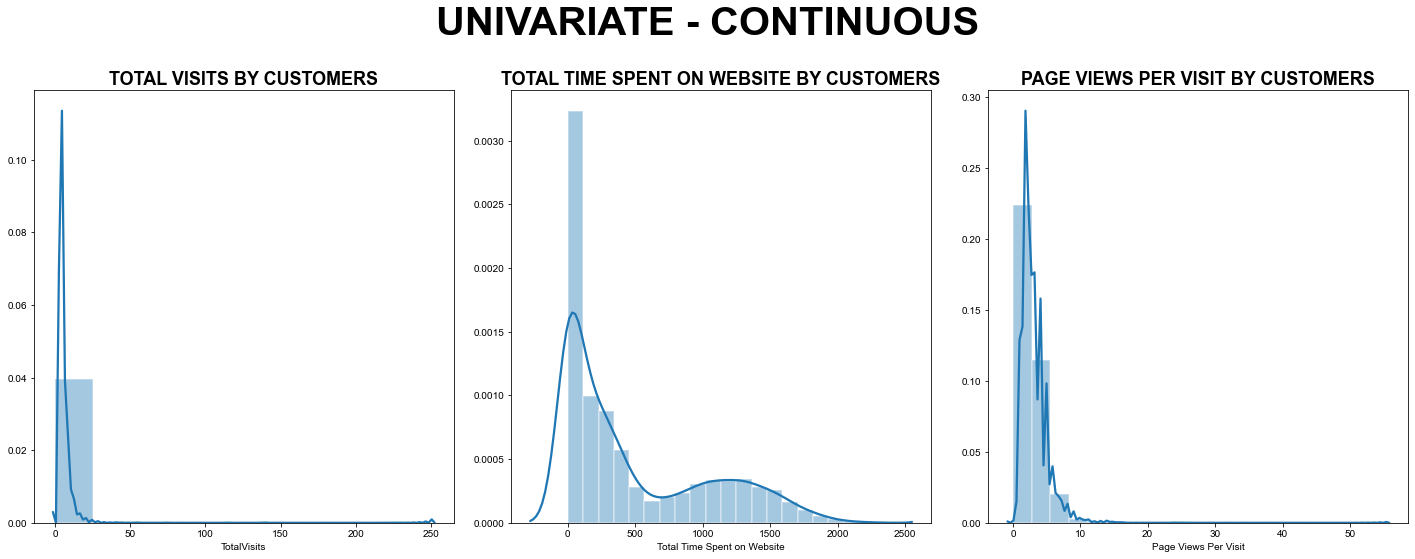

In [32]:
# Creating subplots to produce the plots simultaneously
fig,axis = plt.subplots(1,3,figsize=(20 ,8))

#Setting up the style and contexts
fig.suptitle('Univariate - Continuous'.upper(),weight='bold',fontsize=40)
sns.set_style('whitegrid')
sns.set_context('talk')
sns.axes_style('dark')

#Plotting the Histograms 1 in the subplot with all the parameters required are passed
plot1=sns.distplot(leads_df['TotalVisits'],kde=True,bins=10,ax=axis[0])
plot1.set_title('Total Visits by customers'.upper(),weight='bold')

#Plotting the Histograms 2 in the subplot with all the parameters required are passed
plot2=sns.distplot(leads_df['Total Time Spent on Website'],kde=True,bins=20,ax=axis[1])
plot2.set_title('Total Time Spent on Website by customers'.upper(),weight='bold')

#Plotting the Histograms 3 in the subplot with all the parameters required are passed
plot3=sns.distplot(leads_df['Page Views Per Visit'],kde=True,bins=20,ax=axis[2])
plot3.set_title('Page Views Per Visit by customers'.upper(),weight='bold')

plt.tight_layout()
plt.show()

___Inferences from the above plot:___

1. Most of the visits ranging in between 0 and 20 and there is a value in 250 which clearly shows a customer may be visiting multiple times 
2. Total time spent on the site shows 0 to 200 as the maximum range and it gradually decreases upto 2000
3. Most of the views ranging in between 0 and 10 and there is a value in 55 which clearly shows a customer may be visiting the site multiple times

#### Categorical Variables

We will now see the individual elements given in the DF. Countplots will show us the data distributed across.

In [33]:
def uni_countplot(colx):
    # Creating subplots to produce the plots simultaneously
    fig ,axes=plt.subplots(1,2,figsize=(20,10),sharey=True)
    
    # Setting the figure style
    sns.set_style('whitegrid')
    sns.set_context('talk')
    sns.axes_style('dark')
        
    # Plotting the Countplot 1 in the subplot with all the parameters required are passed
    ax1=sns.countplot(data =leads_df, y=colx,ax=axes[0])
    ax1.set_title(colx.upper(),weight='bold',fontsize=20)
    ax1.set_ylabel(colx.upper(),fontsize=16,weight='bold')
    ax1.set_xlabel('count'.upper(),fontsize=16,weight='bold')
    ax1.set_yticklabels(ax1.get_yticklabels(),rotation=0,fontsize=14)
    ax1.set_xscale('log')
    ax1.tick_params(labelsize=14)
    
    # Plotting the Countplot 2 in the subplot with additional 'Converted' 
    ax2=sns.countplot(data =leads_df, y=colx,hue ='Converted',ax=axes[1])
    ax2.set_title(colx.upper(),weight='bold',fontsize=20)
    ax2.set_ylabel(''.upper(),fontsize=16,weight='bold')
    ax2.set_xlabel('count'.upper(),fontsize=16,weight='bold')
    ax2.set_yticklabels(ax1.get_yticklabels(),rotation=0,fontsize=14)
    ax2.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0,title="Converted")
    ax2.set_xscale('log')
    ax2.tick_params(labelsize=14)
    
    plt.tight_layout()
    plt.show()

Function created, we can able to pass different values to produce distinct plot

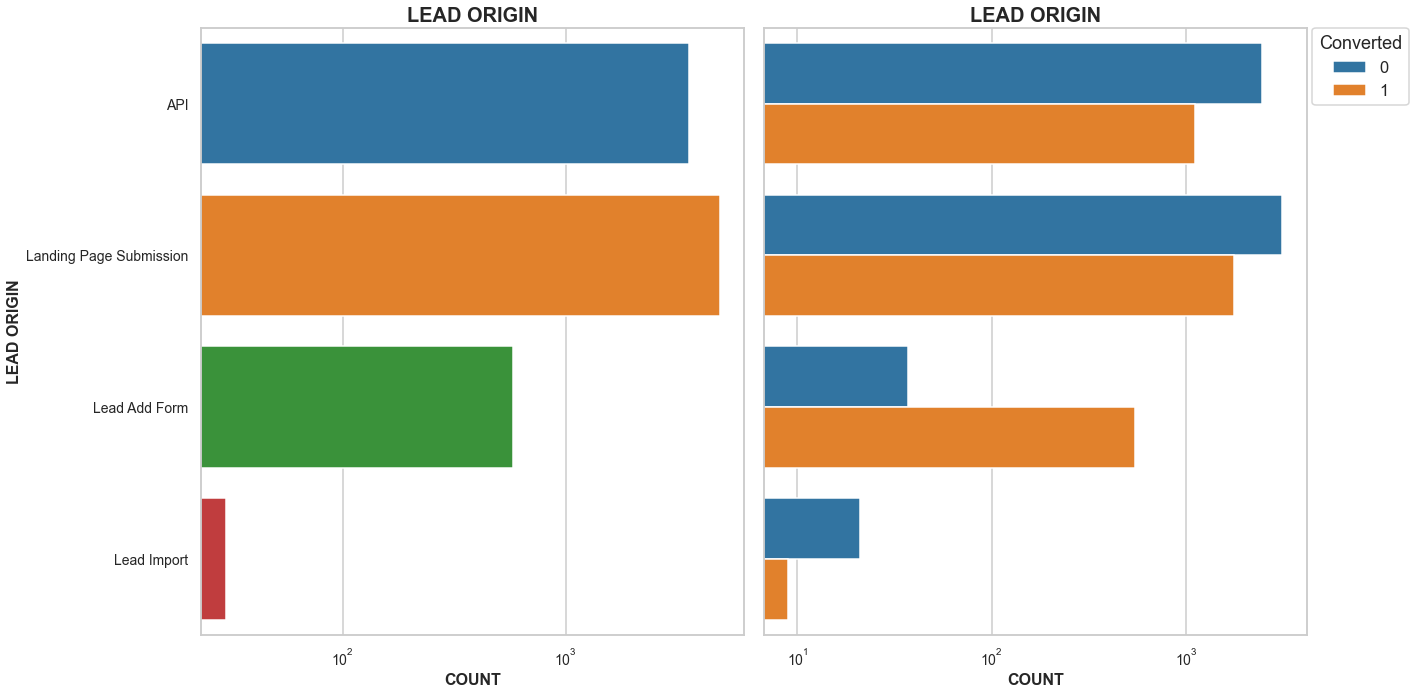

In [34]:
# Passing the parameters in the function to get plots
uni_countplot(colx="Lead Origin")

___Inferences from the above plot:___

1. Lead origin has the maximum value from Landing Page Submission, out of which non-converted leads are seen more
2. Lead Import with lesser values, and nearly 10s of leads are out from it

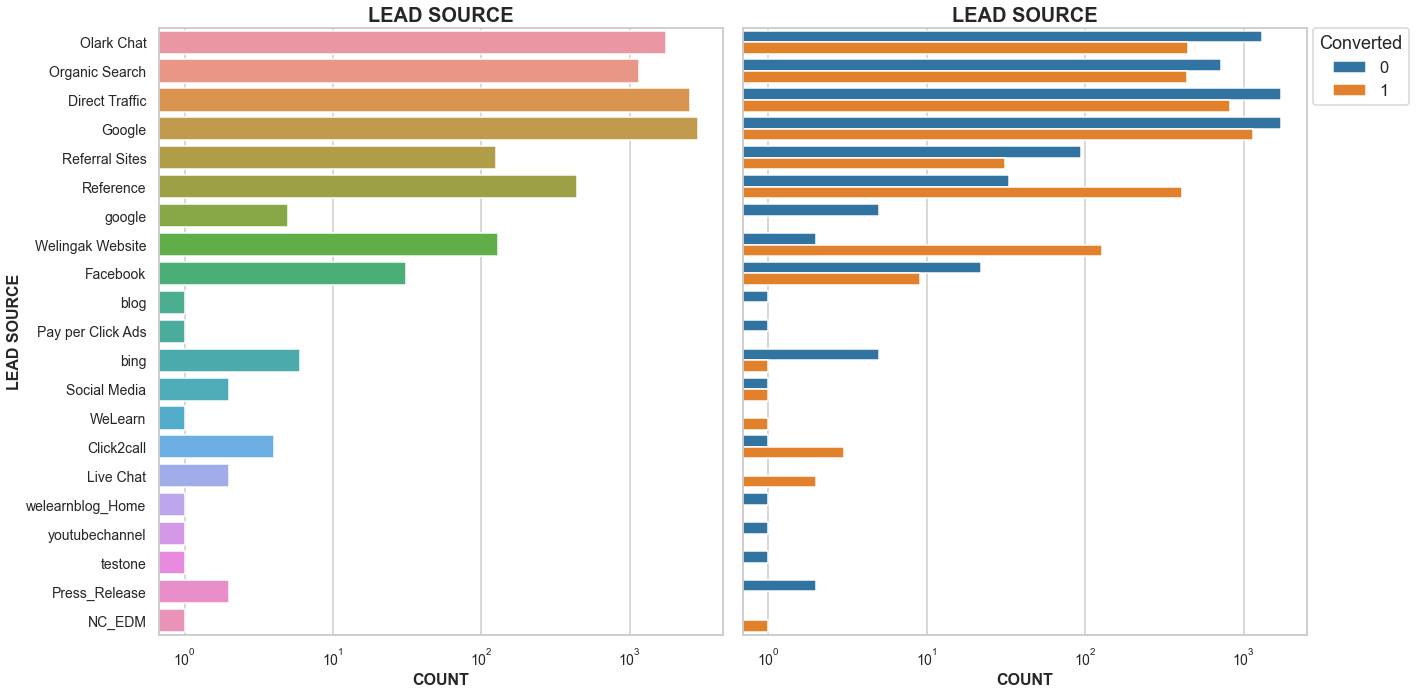

In [35]:
# Passing the parameters in the function to get plots
uni_countplot(colx="Lead Source")

___Inferences from the above plot:___

1. Most of the Lead Sources from the Google, out of which most of the leads are not converted and 1000s of leads are converted
2. Olark Chat and Direct Traffic are the sources of lead to visit the site, after Google with 0 dominates all the variables

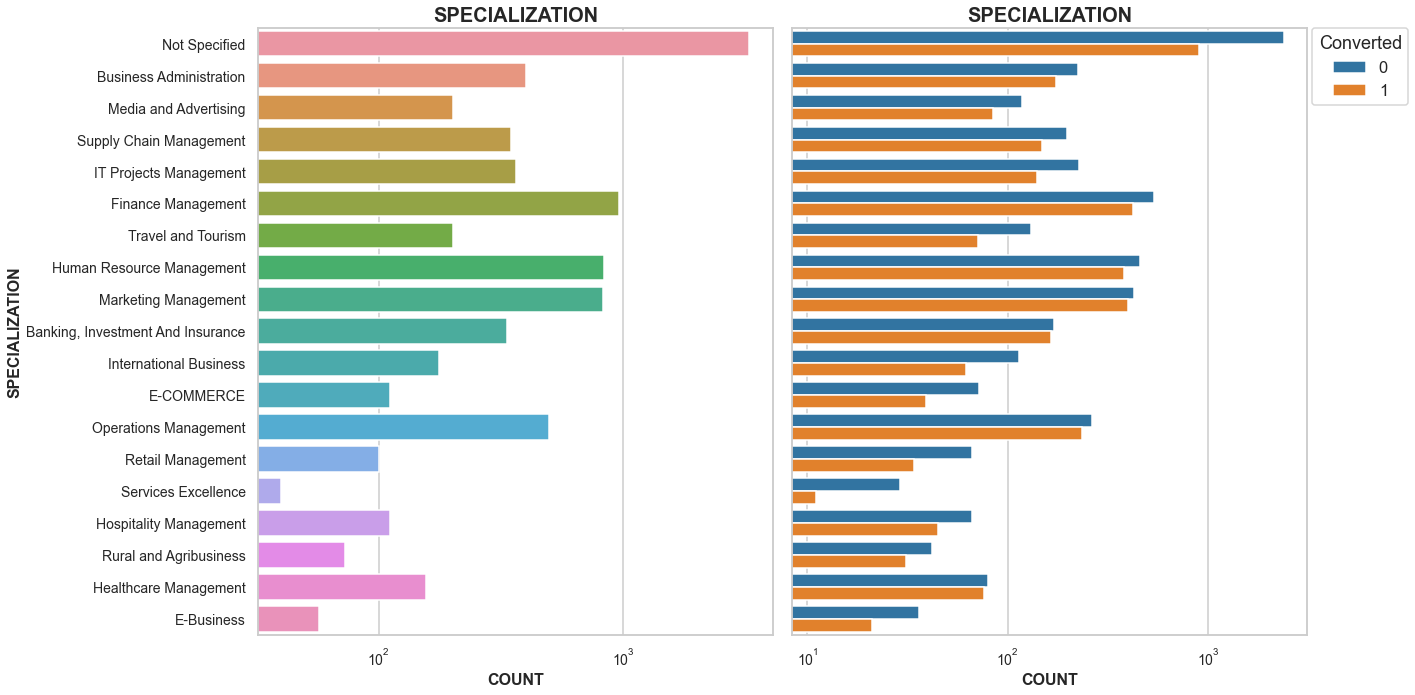

In [36]:
# Passing the parameters in the function to get plots
uni_countplot(colx="Specialization")

___Inferences from the above plot:___

1. Not Specified (___Select___) is the option given more by the leads and the Management leads are the next options
2. In HealthCare Management, data seems balanced and more biased data seen in the Service Excellence

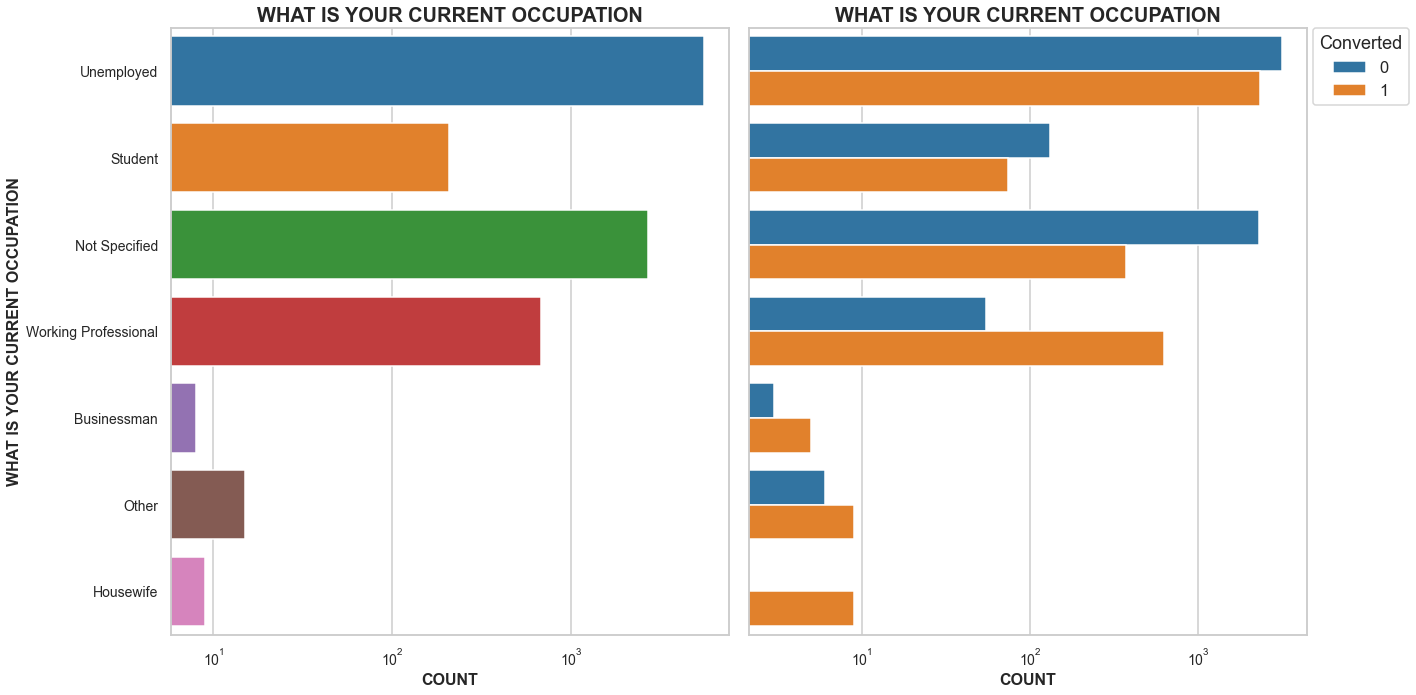

In [37]:
# Passing the parameters in the function to get plots
uni_countplot(colx="What is your current occupation")

___Inferences from the above plot:___

1. Most of the Lead given their current occupation as Unemployed followed by the Not Specified(___Select___)
2. Interestingly, Housewives made all the leads by them as a converted potential leads

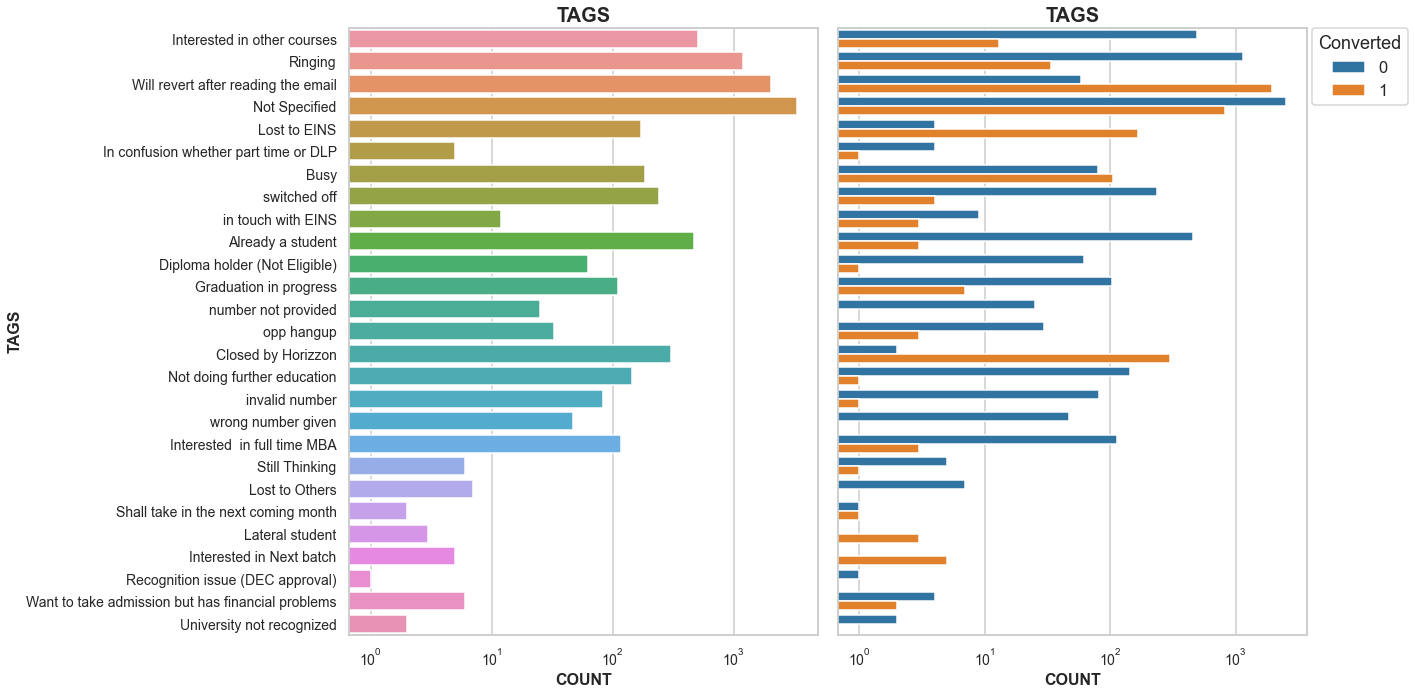

In [38]:
# Passing the parameters in the function to get plots
uni_countplot(colx="Tags")

___Inferences from the above plot:___

1. Not Specified(___Select___) occupied the maximum here also, followed by Will revert, Ringing and Interested are the subsequent options
2. Closed by Horizzon and Will revert shows more number of biased data of converted which seems a healthy bias for the company

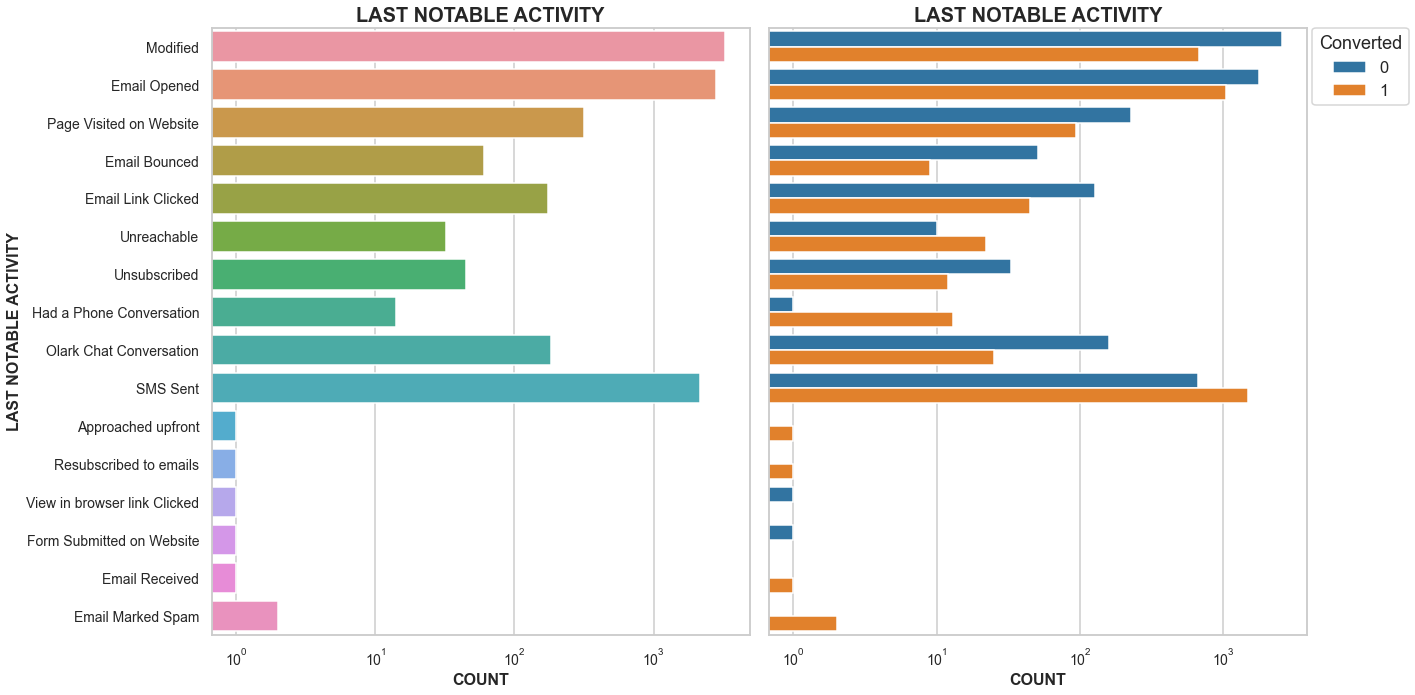

In [39]:
# Passing the parameters in the function to get plots
uni_countplot(colx="Last Notable Activity")

___Inferences from the above plot:___

1. Modified and SMS Sent occupies the first two places, but SMS Sent worked out very well for the company 
2. Approached upfront and Email options also worked good, because it made nearly all of the leads into converted

### Bivariate Analysis

Inferences can be made with the help of bar plots given below. For instance, we are taking here the countries based the top 10 and bottom 10 values respectively.


#### Continuous - Continuous Variables


Here we are going to plot the scatter plots to get the insights out of it

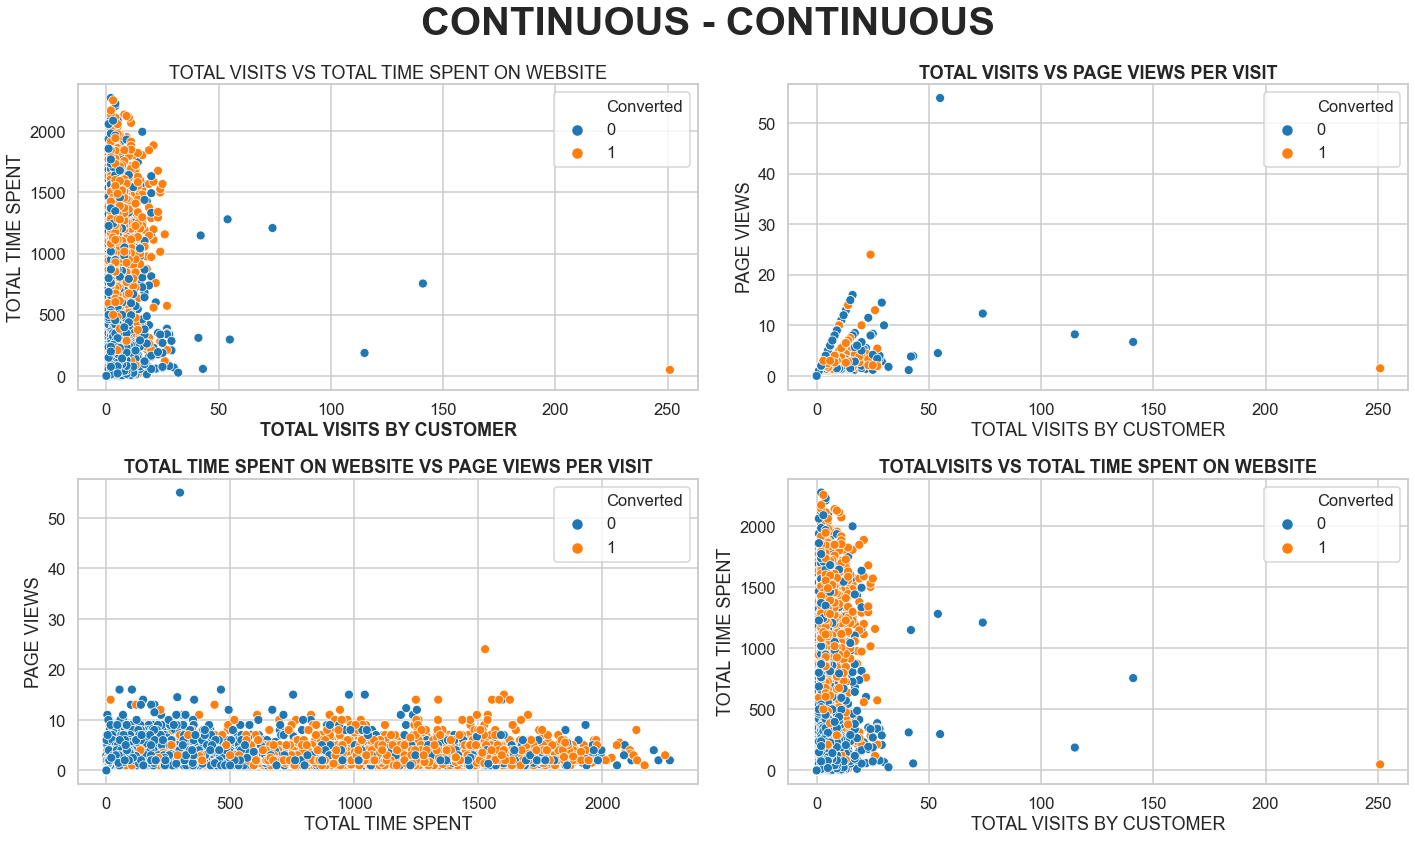

In [40]:
# Creating subplots to produce the plots simultaneously
fig,axis = plt.subplots(2,2,figsize=(20 ,12))

#Setting up the style and contexts
fig.suptitle('Continuous - Continuous'.upper(),weight='bold',fontsize=40)
sns.set_style('whitegrid')
sns.set_context('talk')
sns.axes_style('dark')

# Plotting subplot 1 with necessary parameters
plt.subplot(2,2,1)
sns.scatterplot(data =leads_df, x='TotalVisits',y='Total Time Spent on Website', hue ='Converted')
plt.title('Total Visits vs Total Time Spent on Website'.upper())
plt.xlabel("Total Visits by customer".upper(),weight="bold")
plt.ylabel("Total Time Spent".upper())

# Plotting subplot 2 with necessary parameters
plt.subplot(2,2,2)
sns.scatterplot(data =leads_df, x='TotalVisits',y='Page Views Per Visit', hue ='Converted')
plt.title('Total Visits vs Page Views Per Visit'.upper(),weight="bold")
plt.xlabel("Total Visits by customer".upper())
plt.ylabel("Page views".upper())

# Plotting subplot 3 with necessary parameters
plt.subplot(2,2,3)
sns.scatterplot(data =leads_df, x='Total Time Spent on Website',y='Page Views Per Visit', hue ='Converted')
plt.title('Total Time Spent on Website vs Page Views Per Visit'.upper(),weight="bold")
plt.xlabel("Total Time Spent".upper())
plt.ylabel("Page views".upper())

# Plotting subplot 4 with necessary parameters
plt.subplot(2,2,4)
sns.scatterplot(data =leads_df, x='TotalVisits',y='Total Time Spent on Website', hue ='Converted')
plt.title('TotalVisits vs Total Time Spent on Website'.upper(),weight="bold")
plt.xlabel("Total Visits by customer".upper())
plt.ylabel("Total Time Spent".upper())

plt.tight_layout()
plt.show()

___Inferences from the above plot:___

1. If the visit of a customer is lesser, then they spent a larger amount of time. A customer spent very minimal time , but visited a lot(may be bot!!!)
2. Page visits and views are directly proportional and shows a good pattern
3. Views vs Time spent has a flat pattern , when time increases page views become stagnant and some leads to converted
4. Visits vs Time Spent also a flat pattern, but here time spent becomes stagnant while visits vary

#### Categorical - Continuous Variables

Here we define a function to plot the Bar plots as many as we need in a single line of code

In [41]:
# Defining the fucntion to plot the categorical values
def bibarplot(data,title1,title2,x1,x2,y):    
    
    # Creating subplots to produce the plots simultaneously
    fig ,axes=plt.subplots(1,2,figsize=(25,10))
    
    # Setting the figure style
    sns.set_style('whitegrid')
    sns.set_context('talk')
    sns.axes_style('dark')
    
    # Plotting the Barplot 1 in the subplot with all the parameters required are passed
    ax1=sns.barplot(data =data, y=x1,x=y,ax=axes[0],hue ='Converted',palette='tab10')
    ax1.set_title(title1.upper(),weight='bold',fontsize=20)
    ax1.set_ylabel(x1.upper(),fontsize=16,weight='bold')
    ax1.set_xlabel(y.upper(),fontsize=16,weight='bold')
    ax1.set_yticklabels(ax1.get_yticklabels(),rotation=0,fontsize=14)
    ax1.legend(bbox_to_anchor=(1.01, 1),loc='upper left',title ='Converted', borderaxespad=0,prop={'size': 14})
    ax1.tick_params(labelsize=14)
    
    #Plotting the Barplot 2 in the subplot with all the parameters required are passed
    ax2=sns.barplot(data =data, y=x2,x=y,hue ='Converted',ax=axes[1],palette='tab10')
    ax2.set_title(title2.upper(),weight='bold',fontsize=20)
    ax2.set_ylabel(x2.upper(),fontsize=16,weight='bold')
    ax2.set_xlabel(y.upper(),fontsize=16,weight='bold')
    ax2.set_yticklabels(ax2.get_yticklabels(),rotation=0,fontsize=14)
    ax2.legend(bbox_to_anchor=(1.01, 1),loc='upper left',title ='Converted', borderaxespad=0,prop={'size': 14})
    ax2.tick_params(labelsize=14)
    
    plt.tight_layout()
    plt.show()

Funcions created above and will able to use and get useful insights out 

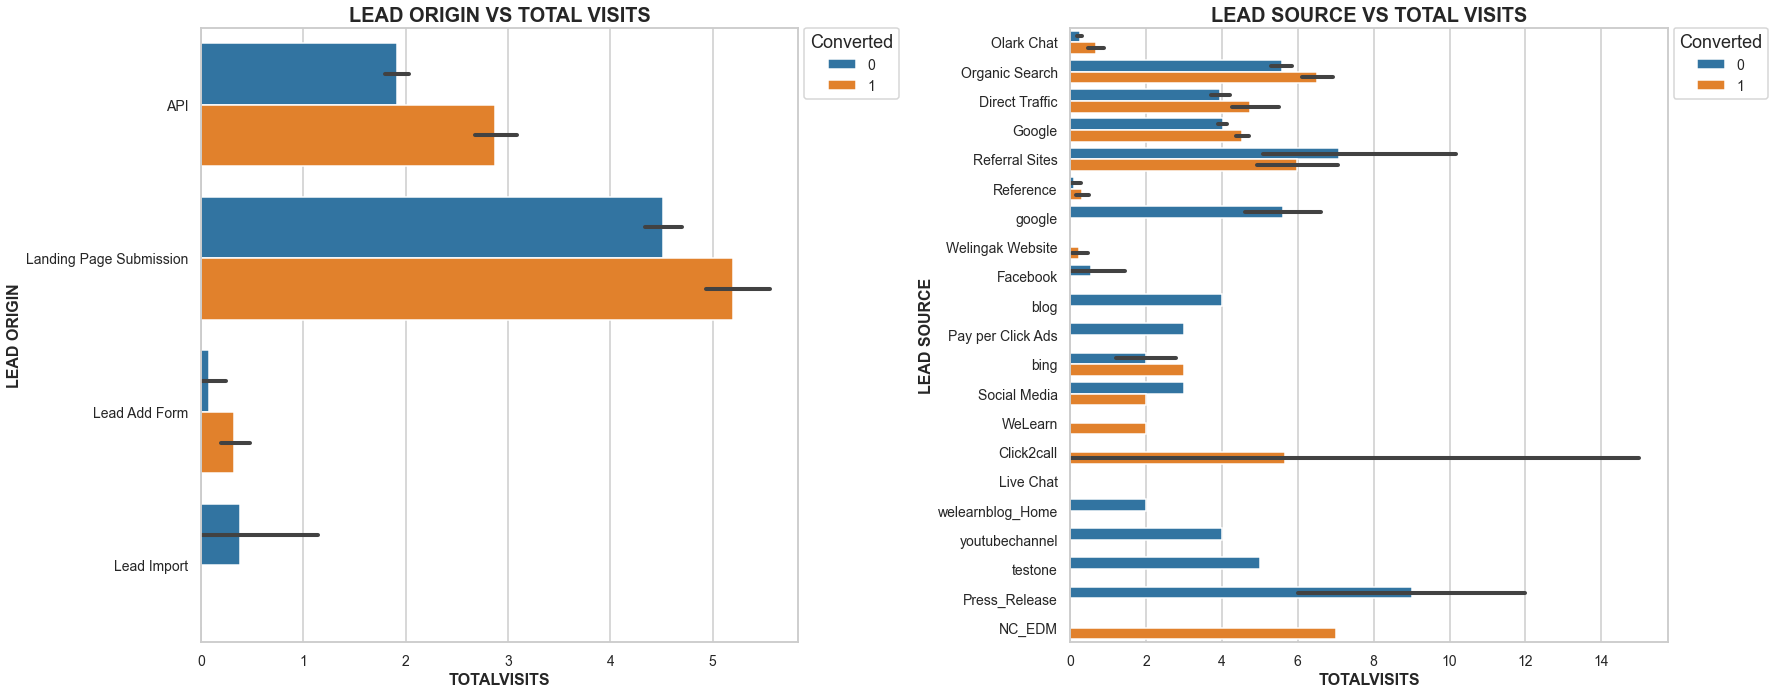

In [42]:
# Passing the parameters in the function to get plots

bibarplot(data=leads_df,title1='Lead Origin vs Total Visits',title2='Lead Source vs total visits',x1='Lead Origin',x2='Lead Source',y='TotalVisits')

___Inferences from the above plot:___

1. Total Visits from Landing Page Submission becomes the more leads to get converted, while, lead import become very minimal
2. Page visits vs Lead Sources from Organic Search and Click2call becomes the successfull converted leads

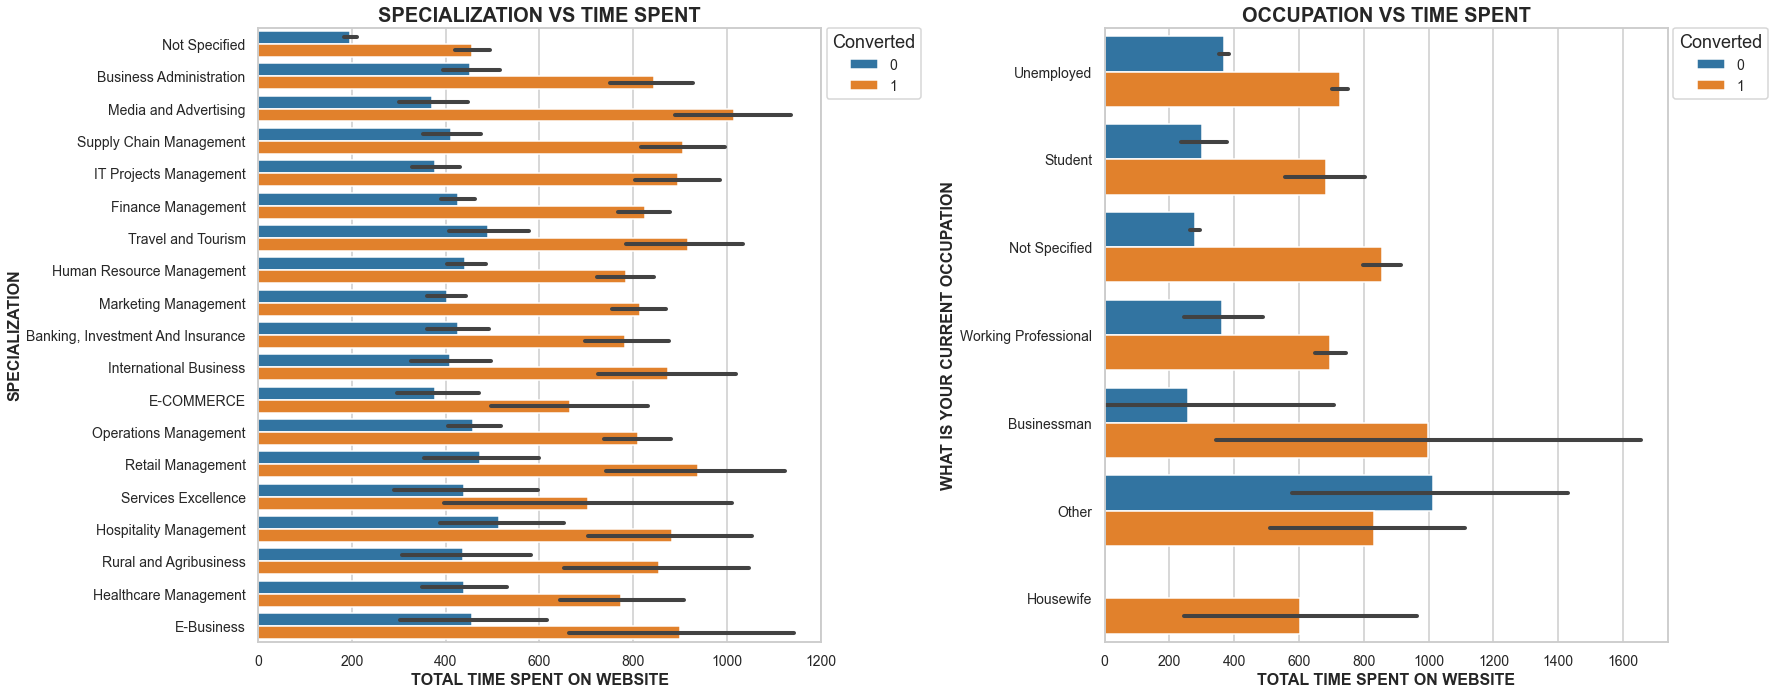

In [43]:
# Passing the parameters in the function to get plots

bibarplot(data=leads_df,title1='Specialization vs Time Spent',title2='occupation vs Time Spent',x1='Specialization',x2='What is your current occupation',y='Total Time Spent on Website')

___Inferences from the above plot:___

1. Total time spent is higher for Media and Advertising category in which more leads converted, while E-Commerce does not show satisfied value
2. Surprisingly, businessmen with nominal time spent on the site become the one who got converted

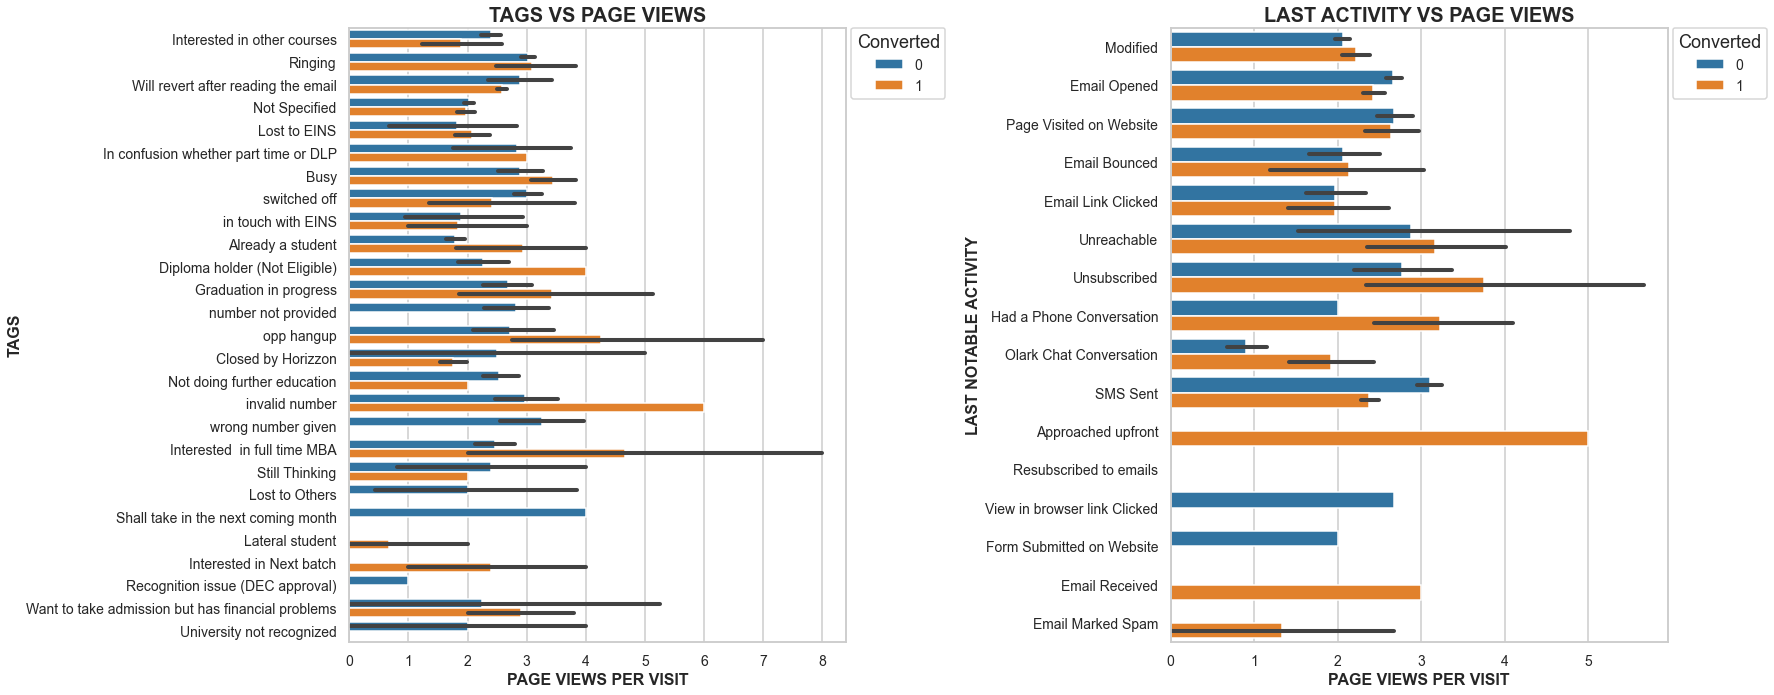

In [44]:
# Passing the parameters in the function to get plots

bibarplot(data=leads_df,title1='Tags vs Page Views',title2='Last Activity vs Page Views',x1='Tags',x2='Last Notable Activity',y='Page Views Per Visit')

___Inferences from the above plot:___

1. Per views lead is highly converted when the tags were invalid numbers, and shall take in next months wont revert 
2. However, Approached upfront the customer made to views more and convert them easily

#### Categorical - Categorical Variables

Here we define a function to plot the Count plots as many as we need in a single line of code

In [45]:
# Defining the function to plot the categorical values
def bivis_cat(colx1,coly1):
    
    # Creating subplots to produce the plots simultaneously
    fig =plt.figure(figsize=(15,10))
    
    # Setting the Style
    sns.set_style('whitegrid')
    sns.set_context('talk')
    sns.axes_style('dark')
    
    # Plotting the Countplot 1 in the subplot with all the parameters required are passed
    ax1=sns.countplot(data =leads_df, y=colx1,hue =coly1,palette='mako')
    ax1.set_title(colx1.upper()+ "  vs "+coly1.upper(),weight='bold',fontsize=20)
    ax1.set_ylabel(colx1.upper(),fontsize=16,weight='bold')
    ax1.set_xlabel(coly1.upper(),fontsize=16,weight='bold')
    ax1.set_yticklabels(ax1.get_yticklabels(),rotation=0,fontsize=14)
    ax1.legend(bbox_to_anchor=(1.01, 1),loc='upper left',borderaxespad=0,title=coly1,prop={'size': 14})
    ax1.set_xscale('log')
    ax1.tick_params(labelsize=14)
    
    plt.tight_layout()
    plt.show()

Funcions created above and will able to use and get useful insights out

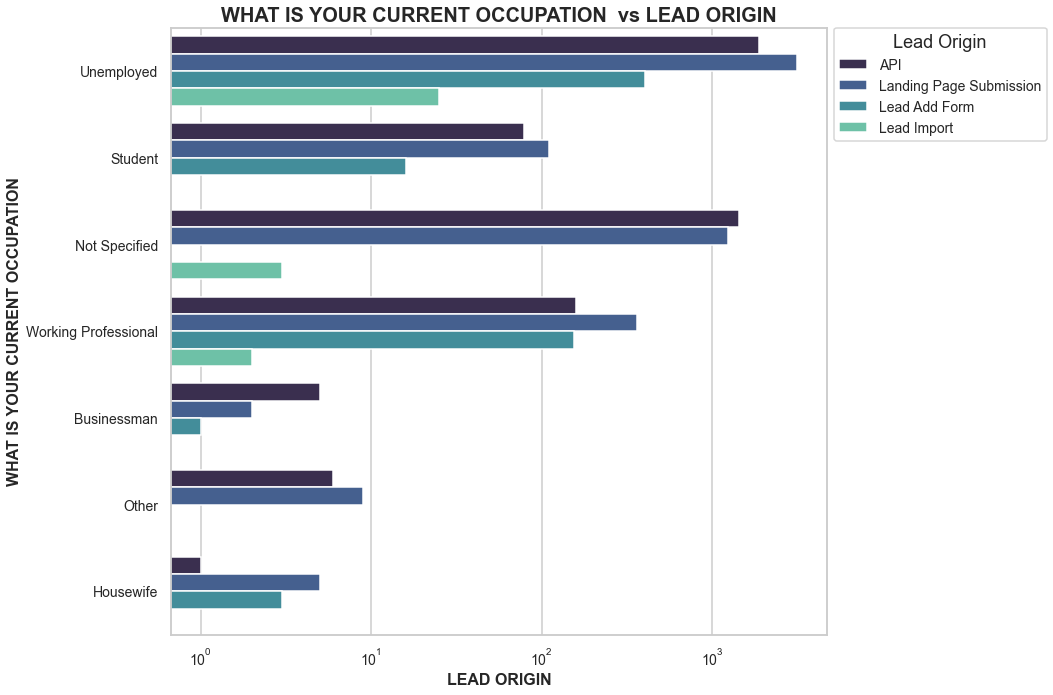

In [46]:
# Passing the parameters in the function to get plots

bivis_cat(colx1='What is your current occupation',coly1='Lead Origin')

___Inferences from the above plot:___

1. Unemployed Landing Page Submission category is the one with 1000s of values gathered for the X Education company
2. Not Specified API leads are the next , while working professional category is following the same

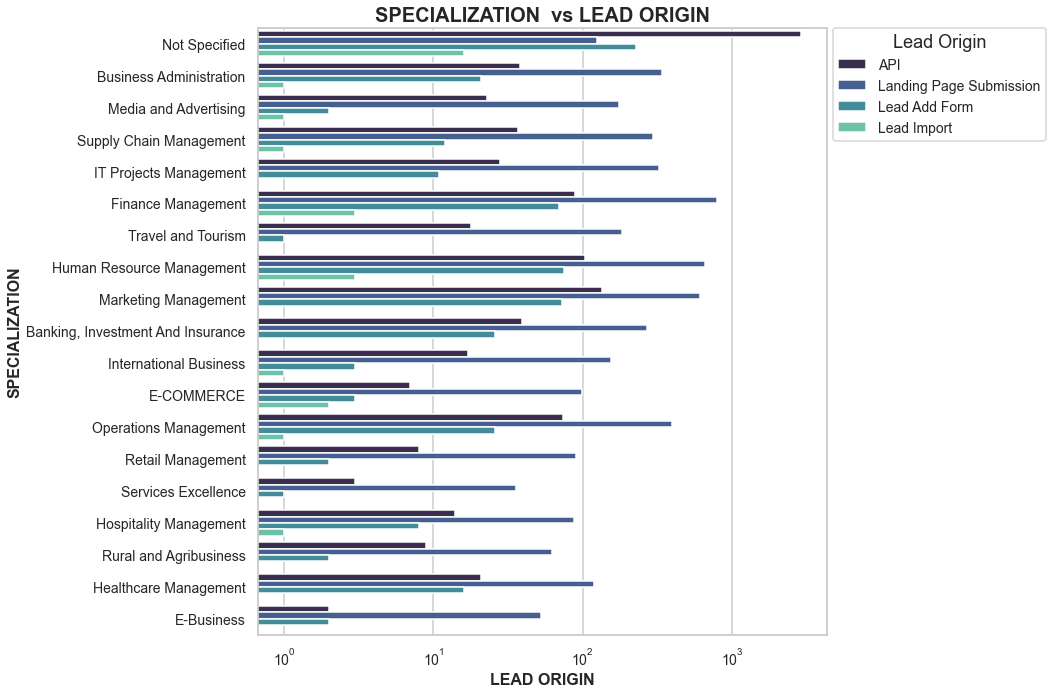

In [47]:
# Passing the parameters in the function to get plots

bivis_cat(colx1='Specialization',coly1='Lead Origin')

___Inferences from the above plot:___

1. Unemployed Specialization with API Lead Origin category is the one with 1000s of values gathered for the X Education company
2. Finance Management Landing Page Submission, HR management Landing Page Submission followed by the Marketing Management options are the subsequent

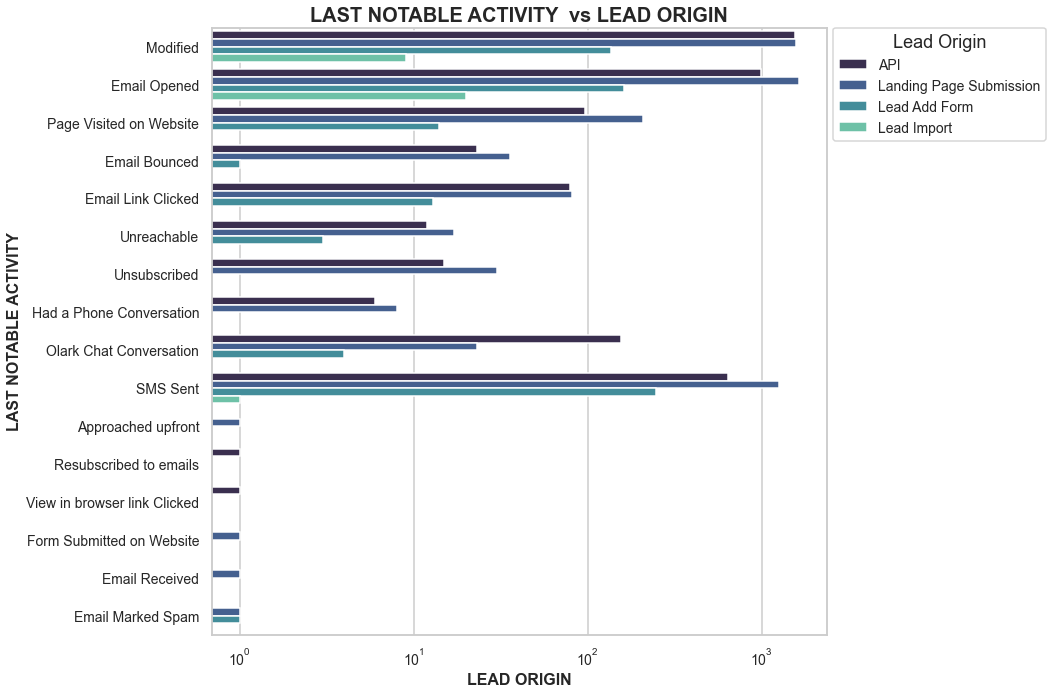

In [48]:
# Passing the parameters in the function to get plots

bivis_cat(colx1='Last Notable Activity',coly1='Lead Origin')

___Inferences from the above plot:___

1. Tags Email Opened with Landing Page Submission are the first with 1000s of lead obtained, Modified Landing Page Submission is the next option
2. Lead Import is the least used Lead Origin category in all of the Last Notable Activity 

### Multivariate

We will take two kinds of plots to identify the trends and correlation between the variables

In [49]:
# Showing the best correlations 
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Getting the correlation
leads_corr =leads_df[num_vars].corr()

# Diagonal triu finding
corr_leads=leads_corr.where(np.triu(np.ones(leads_corr.shape),k=1).astype(bool))

# Unstacking the correlation
corr_leads=corr_leads.unstack().reset_index().dropna(subset=[0])

# Adding the Column names
corr_leads.columns=['Column Variable 1','Column Variable 2','Correlation Value']

# Placing the absolute value
corr_leads['Correlation Absolute']= abs(corr_leads['Correlation Value'])

# Sorting values based on Correlation Absolute
corr_leads.sort_values(by='Correlation Absolute',ascending=False,inplace=True)
corr_leads

,Column Variable 1,Column Variable 2,Correlation Value,Correlation Absolute
6,Page Views Per Visit,TotalVisits,0.511068,0.511068
7,Page Views Per Visit,Total Time Spent on Website,0.318350,0.318350
3,Total Time Spent on Website,TotalVisits,0.219723,0.219723


The Above values shows the two variables and its correlations with its absolute correlation values in our DF

### Heat Map

A representation of data in the form of a map or diagram in which data values are represented as colours

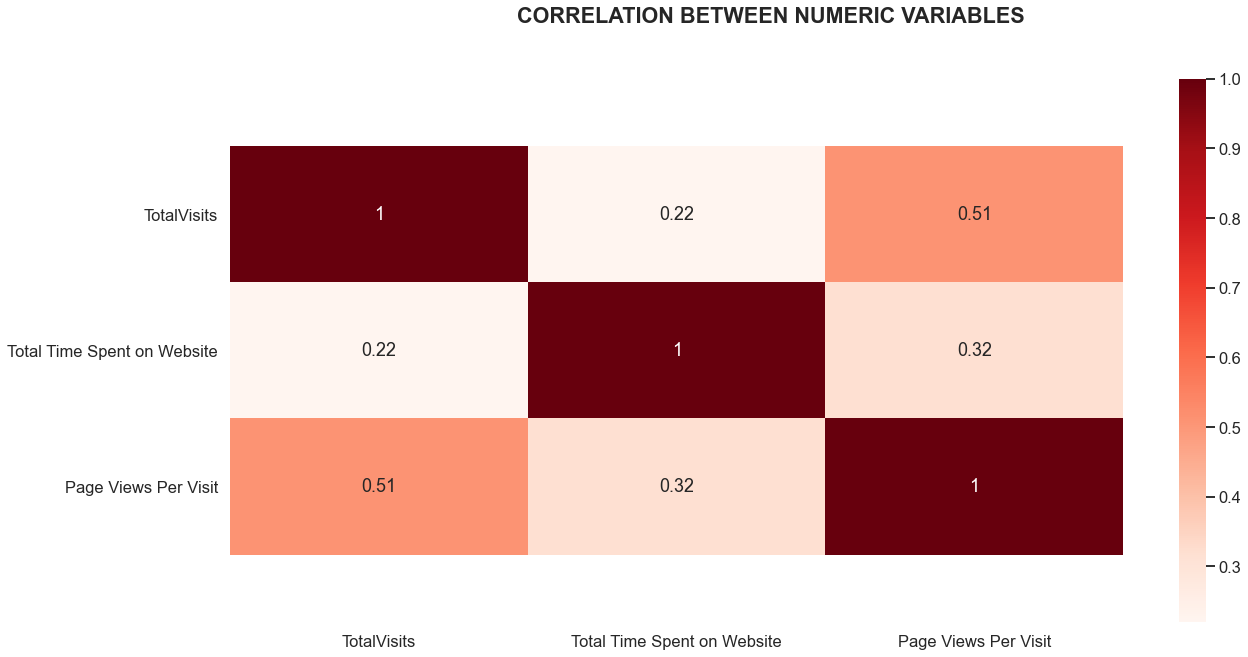

In [50]:
# Producing the Heatmap to see the correlation

plt.figure(figsize=(20, 10))
ax = sns.heatmap(leads_corr, annot = True,cmap='Reds')
plt.suptitle("Correlation between Numeric Variables".upper(),fontweight="bold")

# To avoid the axis slip from the needed space,we are adding limits below
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


___Inferences from the above plot:___

1. Total Visits and Page Views are correlated with 0.51 correlation value, whereas the page views are minimally correlated with Time Spent variable
2. Time Spent is having positive correlation with Total Visits also

### Pair plot
Depends on the distributed diagonal values, we can say something about data

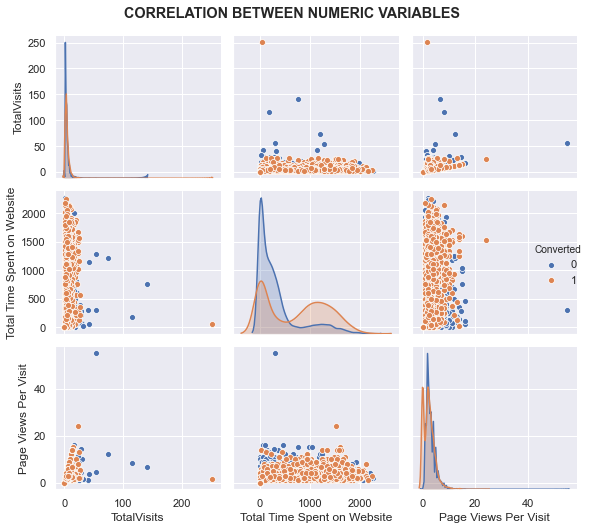

In [51]:
# Plotting the pairplot to see the trend

sns.set(font_scale = 1)
plot =sns.pairplot(data=leads_df,vars=num_vars,diag_kind='kde',hue="Converted")
plot.fig.suptitle("Correlation between Numeric Variables".upper(),weight="bold")
plt.tight_layout()
plt.show()

___Inferences from the above plot:___

1. Converted hues and Total Visits showing some pattern whereas it is flat with the rest
2. Total Visits and Page Views are correlated positively , and Time Spent seems to be inversely correlated
3. Page Visits and Time Spent shows a clustered data, where as it is flat with Converted variable
4. Converted hues and Total Time Spent showing some pattern which is wavy with more converted 0 values overall

### Data Imbalance Check

This parameter will be used very well in determining how well the data between the two categories spread

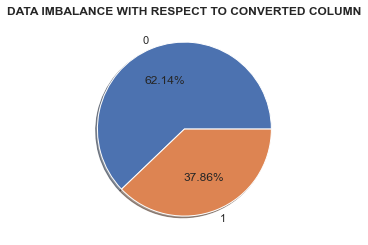

In [52]:
# Function to create Pie chart to check data imbalance

def plot_pie(columns,df,title):
    temp_var = df[columns].value_counts()
    df = pd.DataFrame({'labels': temp_var.index,'values': temp_var.values})
    plt.title(title,weight="bold")
    plt.pie(df['values'], labels=df['labels'].unique(), autopct='%1.2f%%', shadow=True)
    
# Pie plot to visualize the data w.r.t Converted
plot_pie('Converted',leads_df,'Data Imbalance with respect to Converted column'.upper())

___Inference from the above plot:___  
While checking for the data imbalance with our target variable ___Converted___, it shows only ___38%___ leads converted and rest not converted 

In [53]:
# Details of the categorical values

leads_df.select_dtypes('object').describe()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
count,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074
unique,9074,4,21,2,17,19,7,27,2,16
top,be4c7a7b-f123-42f2-8868-a005c83a1576,Landing Page Submission,Google,No,Email Opened,Not Specified,Unemployed,Not Specified,No,Modified
freq,1,4885,2868,8358,3432,3282,5476,3327,6186,3267


Below columns are having binary unique values as'Yes' and 'No' and it can be converted to '0' and '1'.
* ___Do Not Email___
* ___A free copy of Mastering The Interview___


## Data Preparation


#### Converting some binary variables (Yes/No) to 0/1
Conversion of the categorical variables and it values appropriately will never be void before processing for the model building

In [54]:
# Index to add it in use it later
leads_df_index = leads_df[['Prospect ID','Lead Number']]

# List of variables to map
varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the varlist defined 
leads_df[varlist] = leads_df[varlist].apply(binary_map)

Yes/No values have been mapped with 1/0 in order to make everything numeric and followed by we will do the dummy variable creation in the next step

### Dummy Features Creation

Dummy feature is a numerical feature used in regression analysis to represent subgroups of the columns in the DF.  
Dummy variables are mandatory because they take the columns with multi-category and providing us a single regression group.

In [55]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 
                                  'What is your current occupation','Tags','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads_df = pd.concat([leads_df, dummy1], axis=1)
leads_df = leads_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                          'What is your current occupation','Tags','Last Notable Activity'], axis = 1)

leads_df.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Now totally there were about ___9 categorical columns___ with ___4 numerical columns___, they were dummied and processed in order to make every column numeric opt for modelling

In [56]:
# Seeing the descriptive analysis of the DF

leads_df.describe(percentiles=[.25,.5,.75,.9,.95,.99])

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,...,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,...,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.078907,0.378554,3.456028,482.887481,2.370151,0.318272,0.538351,0.064029,0.003306,0.280251,0.003416,0.316068,0.000220,0.000110,...,0.006612,0.019065,0.000220,0.311109,0.000110,0.000110,0.001543,0.360040,0.020168,0.035045,0.000110,0.237161,0.003527,0.004959,0.000110
std,23348.029512,0.269608,0.485053,4.858802,545.256560,2.160871,0.465831,0.498554,0.244818,0.057407,0.449147,0.058353,0.464965,0.014845,0.010498,...,0.081051,0.136763,0.014845,0.462973,0.010498,0.010498,0.039251,0.480038,0.140581,0.183904,0.010498,0.425365,0.059283,0.070251,0.010498
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615278.500000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637176.500000,0.000000,1.000000,5.000000,922.750000,3.200000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,650276.800000,0.000000,1.000000,7.000000,1373.000000,5.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
95%,655344.450000,1.000000,1.000000,10.000000,1557.000000,6.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
99%,659563.350000,1.000000,1.000000,17.000000,1839.000000,9.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000


We can see that all variables as numeric and descriptive analysis DF shows pretty much good amount of information 

### Outliers Analysis

An outliers are the data points of a set that stands out isolated from the rest  
In other words, outliers are those data points that lie outside the overall pattern of distribution of the data  
The easiest way to detect outliers is to looking at the boxplots

In [57]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%

leads_df[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']].describe(percentiles=[.25, .5, 
                                                                                                     .75, .90, .95, .99])

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
count,9074.000000,9074.000000,9074.000000
mean,3.456028,2.370151,482.887481
std,4.858802,2.160871,545.256560
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,11.000000
50%,3.000000,2.000000,246.000000
75%,5.000000,3.200000,922.750000
90%,7.000000,5.000000,1373.000000
95%,10.000000,6.000000,1557.000000
99%,17.000000,9.000000,1839.000000


From the distribution shown above, you can see that there are outliers in your data but understandably we know it is fine   
Otherwise, the numbers are gradually increasing in all of the columns mentioned above

In [58]:
# Box plot for Outlier Analysis

def uniboxplot(data1):
    
    # Creating subplots to produce the plots simultaneously
    fig,axis = plt.subplots(1,3,figsize=(30,8))
    
    #Setting up the style and contexts
    fig.suptitle('Leads Scoring Data'.upper(),weight='bold',fontsize=40)
    sns.set_style('whitegrid')
    sns.set_context('talk')
    sns.axes_style('dark')
    
    #Plotting the boxplot 1 in the subplot with all the parameters required are passed
    plot1 = sns.boxplot(data=data1,y='TotalVisits', ax = axis[0],palette="Dark2")
    plot1.set_xlabel('Total Visits'.upper(),fontsize = 28)
    plot1.set_ylabel('Count'.upper(),fontsize = 30)
    
    #Plotting the boxplot 2 in the subplot with all the parameters required are passed
    plot2 = sns.boxplot(data=data1,y='Page Views Per Visit', ax = axis[1])
    plot2.set_xlabel('Page Views'.upper(),fontsize = 28)
    plot2.set_ylabel('')
    
    #Plotting the boxplot 3 in the subplot with all the parameters required are passed
    plot3 = sns.boxplot(data=data1,y='Total Time Spent on Website', ax = axis[2],palette="Dark2")
    plot3.set_xlabel('Total Time Spent'.upper(),fontsize = 28)
    plot3.set_ylabel('')

    plt.tight_layout()
    plt.show()

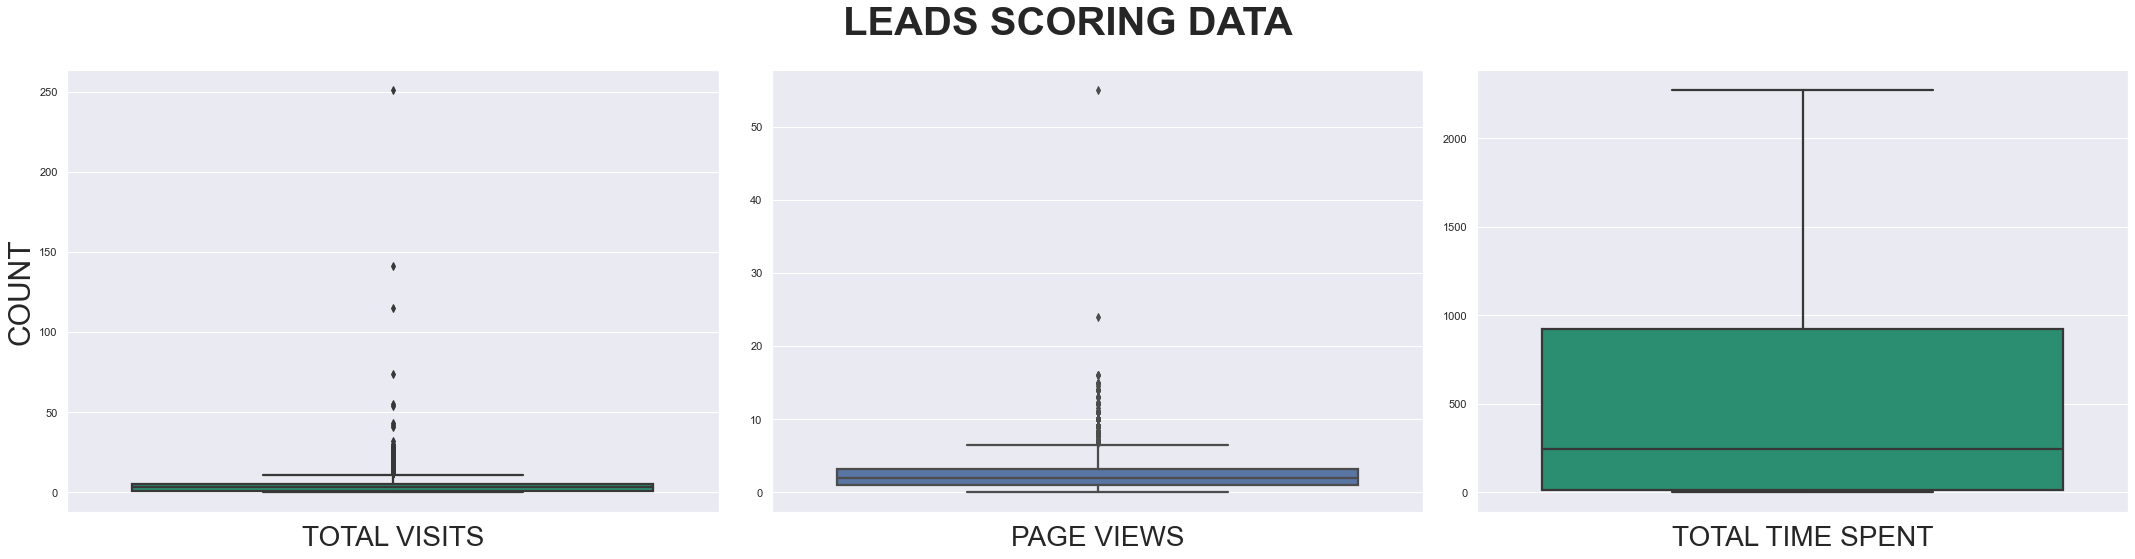

In [59]:
# Passing the parameters in the function to get plots

uniboxplot(leads_df)

___Inferences from the above plot:___

1. Total Visits column has pretty much good data, but also with the some of the outliers seen at the range of 100 and 250
2. Page Views variable has the pattern same as Total Visits, but the outliers are seen from 10 till 60
3. Total Time Spent variable has not seen with any visible outliers inside whiskers

___Outliers are seen here and we are not handling any outlier treatments since it may not give the CEO the fullest what he wants___

## Train - Test Split

Train Sets are the one which would have more than 50% of the data, be used to train the model depends on various factors  
Test Sets are the one which would be used to test the model trained and further proceeds for the prediction

In [60]:
# Importing train test split from model selection
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = leads_df.drop(['Converted'], axis=1)

# Putting response variable to y
y = leads_df['Converted']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Saving separately the columns to assign a lead score to each of the leads
X_test_index = X_test[['Prospect ID','Lead Number']]

# Dropping the unnecessary columns
X_train = X_train.drop(['Prospect ID','Lead Number'],axis=1)
X_test = X_test.drop(['Prospect ID','Lead Number'],axis=1)

Leads DF has been splitted into ___70% training set___ and ___30% test set___ which would now be using to build the model 

## Feature Scaling

Feature Scaling is a technique/method for standardizing or normalizing the features present in the data in a fixed range  
If feature scaling is not done, then our algorithm tends not to work better

In [61]:
# Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Creating the Scaler instance
scaler = MinMaxScaler()

# Fitting the variables for scaling
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0.007968,0.178347,0.083333,1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0.007968,0.085355,0.083333,0,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0.007968,0.619946,0.083333,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0.019920,0.711590,0.104167,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


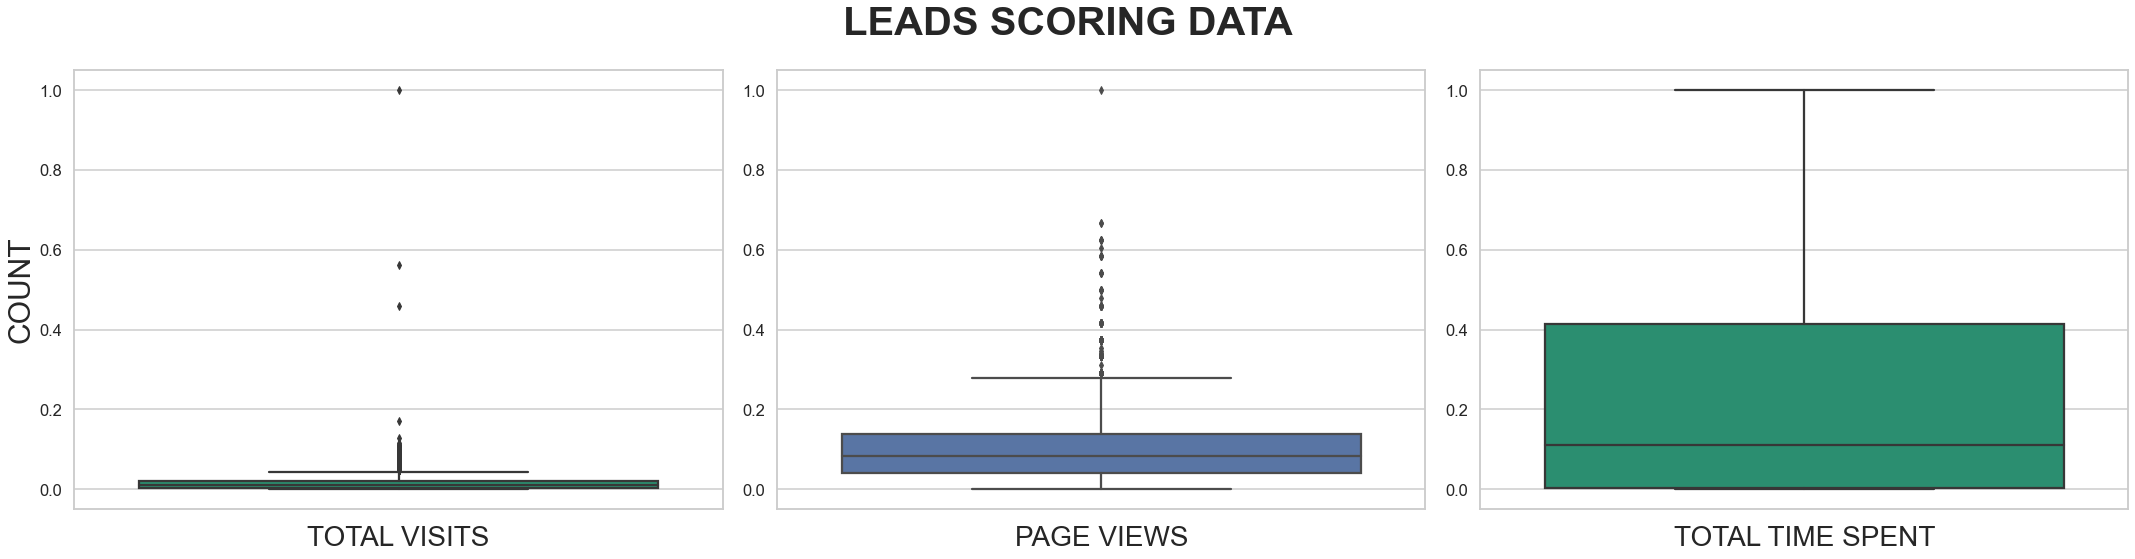

In [62]:
# Passing the parameters in the function to get plots

uniboxplot(X_train)

___Inferences from the above plot:___

1. Total Visits column has pretty much good data, but also with the some of the outliers seen at the range of 0.4 and 1.0
2. Page Views variable has the pattern same as Total Visits, but the outliers are seen from 0.2 till 1
3. Total Time Spent variable has not seen with any visible outliers inside whiskers

Most Importantly, as we see there is no change or affect of data after scaling the columns using Min-Max Scaler  

Numerical variables have been taken as a list and passed as the columns in the scaler function except the scaled and the two binary variables out there in the DF


## Model Building

Our DF is ready for building the models and followed by we will evaluate the model metrics in minding various factor


__Building the First Model__

In [63]:
# Importing the statsmodels api
import statsmodels.api as sm

# Initial Logistic regression model with all features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6244
Model Family:                Binomial   Df Model:                          106
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -957.85
Date:                Tue, 24 Nov 2020   Deviance:                       1915.7
Time:                        10:46:01   Pearson chi2:                 1.13e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     21.8876   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Do Not Email                                              -1.7004      0.383     -4.437      0.000      -2.452      -0.949
TotalVisits                                                7.1267      1.862      3.826      0.000       3.476      10.777
Total Time Spent on Website                                4.8914      0.299     16.360      0.000       4.305       5.477
Page Views Per Visit                                      -1.0270      0.974     -1.054      0.292      -2.937       0.883
A free copy of Mastering The Interview                    -0.3234      0.205     -1.576      0.115      -0.726       0.079
Lead Origin_Landing Page Submission                       -0.6121      0.258     -2.372      0.018      -1.118      -0.106
Lead Origin_Lead Add Form                                 -4.3605      3.687     -1.183      0.237     -11.588       2.867
Lead Origin_Lead Import                                   26.3479   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Direct Traffic                                -5.1961      5.006     -1.038      0.299     -15.008       4.616
Lead Source_Facebook                                     -31.3337   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                        -5.1508      5.004     -1.029      0.303     -14.958       4.657
Lead Source_Live Chat                                     19.9686   1.53e+05      0.000      1.000   -2.99e+05    2.99e+05
Lead Source_NC_EDM                                        21.8893   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Olark Chat                                    -4.1617      4.996     -0.833      0.405     -13.953       5.630
Lead Source_Organic Search                                -5.2378      5.007     -1.046      0.295     -15.050       4.575
Lead Source_Pay per Click Ads                            -24.4622   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Press_Release                                -25.8162   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Reference                                     -0.0183      3.398     -0.005      0.996      -6.679       6.642
Lead Source_Referral Sites                                -5.0153      5.031     -0.997      0.319     -14.876       4.845
Lead Source_Social Media                                  -2.8367      7.935     -0.357      0.721     -18.389      12.715
Lead Source_WeLearn                                     1.997e-09   9.91e-05   2.01e-05      1.000      -0.000       0.000
Lead Sou

From the above summary of the model built, we can conclude that there are lot of variables which might be removed from the training set to make the model and predictions better

## Feature Selection Using RFE

__Recursive feature elimination (RFE)__ is a feature selection method that fits a model and let us know the insignificant feature variable(s) until the specified number of features we give is reached

In [64]:
# Importing the Logistic Regression and RFE from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Initiating the model
logreg = LogisticRegression()

# running RFE with 13 variables as output
rfe = RFE(logreg, n_features_to_select=13)        
rfe = rfe.fit(X_train, y_train)

print("The Features obtained from using the RFE are as follows:")
print("=="*50)
pd.DataFrame(list(zip(X_train.columns, rfe.support_,rfe.ranking_)),columns=['Feature','Seleted by RFE?','Rank'])

The Features obtained from using the RFE are as follows:


,Feature,Seleted by RFE?,Rank
0,Do Not Email,False,4
1,TotalVisits,False,10
2,Total Time Spent on Website,True,1
3,Page Views Per Visit,False,39
4,A free copy of Mastering The Interview,False,44
...,...,...,...
104,Last Notable Activity_Resubscribed to emails,False,65
105,Last Notable Activity_SMS Sent,False,11
106,Last Notable Activity_Unreachable,False,19
107,Last Notable Activity_Unsubscribed,False,26


In [65]:
# Selecting only the columns provided by RFE

columns = X_train.columns[rfe.support_]
X_train = X_train[columns]

print("This is the final DF we obtained with the help of RFE")
X_train.head()

This is the final DF we obtained with the help of RFE


,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_SMS Sent,What is your current occupation_Not Specified,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given
3009,0.178347,0,0,1,0,0,0,1,0,0,0,0,0
1012,0.085355,0,0,0,0,0,0,1,0,0,0,0,0
9226,0.000000,0,1,0,0,0,0,0,1,0,0,0,0
4750,0.619946,0,1,1,0,0,0,1,0,0,0,0,0
7987,0.711590,0,1,0,0,0,1,0,0,0,0,0,0


### Model Assessment

We will use the above obtained final DF and get to the satisfied outcome from the models

In [66]:
# Defining function will build the model for the dataset 
def logreg_model(df):
    
    # Adding Constant as we need to perform this step in SM
    x_train_logreg = sm.add_constant(df)
    
    # Fitting the model
    model = sm.GLM(y_train,x_train_logreg,family = sm.families.Binomial()).fit()
    
    # Returning the Summary
    return model.summary()

In [67]:
# Defining function will find the Variance Inflation Factor of the columns in the dataset 
def vif_value_finder(df):
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    columns = df.columns
    vif['Features'] = df[columns].columns
    vif['VIF'] = [variance_inflation_factor(df[columns].values, i) for i in range(df[columns].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

#### Model 2:

We will use the variables obtained from RFE and build the model once again

In [68]:
# Model 2 - with the columns from RFE model

logreg_model(X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1154.4
Date:                Tue, 24 Nov 2020   Deviance:                       2308.8
Time:                        10:46:26   Pearson chi2:                 7.97e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.8297      0.207    -23.363      0.000      -5.235      -4.425
Total Time Spent on Website                       3.8305      0.230     16.675      0.000       3.380       4.281
Lead Origin_Lead Add Form                         2.1846      0.335      6.519      0.000       1.528       2.841
Last Activity_SMS Sent                            2.1457      0.124     17.330      0.000       1.903       2.388
What is your current occupation_Not Specified    -2.9157      0.152    -19.177      0.000      -3.214      -2.618
Tags_Busy                                         2.5098      0.292      8.607      0.000       1.938       3.081
Tags_Closed by Horizzon                           7.9763      0.741     10.763      0.000       6.524       9.429
Tags_Lost to EINS                                 9.2031      0.781     11.788      0.000       7.673      10.733
Tags_Not Specified                                4.1448      0.222     18.685      0.000       3.710       4.580
Tags_Ringing                                     -1.3978      0.305     -4.589      0.000      -1.995      -0.801
Tags_Will revert after reading the email          6.6831      0.258     25.920      0.000       6.178       7.188
Tags_invalid number                             -21.5155   1.59e+04     -0.001      0.999   -3.12e+04    3.12e+04
Tags_switched off                                -1.3287      0.562     -2.363      0.018      -2.431      -0.227
Tags_wrong number given                         -22.1488   2.11e+04     -0.001      0.999   -4.15e+04    4.14e+04
=================================================================================================================
"""

We have obtained a good model above, but we can say there are couple of values make the model insignificant which must be removed from the training set  
However, we will determine the VIF values for the model built

In [69]:
# Checking the VIF values for the columns in the DF

vif_value_finder(X_train)

,Features,VIF
7,Tags_Not Specified,4.94
3,What is your current occupation_Not Specified,4.40
0,Total Time Spent on Website,2.01
9,Tags_Will revert after reading the email,1.95
2,Last Activity_SMS Sent,1.71
1,Lead Origin_Lead Add Form,1.40
5,Tags_Closed by Horizzon,1.21
8,Tags_Ringing,1.16
6,Tags_Lost to EINS,1.08
4,Tags_Busy,1.07


In order to remove the High Inflation Factor, we set the VIF range as __4__   
Hence we remove the ___Tags_Not Specified___ with ___VIF as 4.94___

In [70]:
# Dropping the column from the DF

X_train.drop(['Tags_Not Specified'], axis = 1,inplace = True)

#### Model 3:

We will use the variables obtained from above DF and build the model once again

In [71]:
# Model 3 - with the columns from RFE model

logreg_model(X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1423.8
Date:                Tue, 24 Nov 2020   Deviance:                       2847.6
Time:                        10:46:27   Pearson chi2:                 9.16e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.6032      0.097    -26.929      0.000      -2.793      -2.414
Total Time Spent on Website                       3.3728      0.199     16.969      0.000       2.983       3.762
Lead Origin_Lead Add Form                         3.0587      0.279     10.972      0.000       2.512       3.605
Last Activity_SMS Sent                            2.3153      0.110     21.096      0.000       2.100       2.530
What is your current occupation_Not Specified    -0.9681      0.114     -8.464      0.000      -1.192      -0.744
Tags_Busy                                         0.2982      0.240      1.244      0.214      -0.172       0.768
Tags_Closed by Horizzon                           5.7378      0.720      7.973      0.000       4.327       7.148
Tags_Lost to EINS                                 5.7615      0.726      7.935      0.000       4.338       7.185
Tags_Ringing                                     -3.7088      0.260    -14.269      0.000      -4.218      -3.199
Tags_Will revert after reading the email          4.4992      0.191     23.510      0.000       4.124       4.874
Tags_invalid number                             -23.7569   1.58e+04     -0.002      0.999   -3.09e+04    3.09e+04
Tags_switched off                                -3.5407      0.534     -6.633      0.000      -4.587      -2.495
Tags_wrong number given                         -24.3367    2.1e+04     -0.001      0.999   -4.11e+04    4.11e+04
=================================================================================================================
"""

We have obtained a good model above once again, but we can say there are couple of values make the model insignificant which must be removed from the training set  
However, we will determine the VIF values for the model built

In [72]:
# Checking the VIF values for the columns in the DF

vif_value_finder(X_train)

,Features,VIF
0,Total Time Spent on Website,1.88
8,Tags_Will revert after reading the email,1.81
2,Last Activity_SMS Sent,1.64
1,Lead Origin_Lead Add Form,1.33
5,Tags_Closed by Horizzon,1.19
3,What is your current occupation_Not Specified,1.16
7,Tags_Ringing,1.14
4,Tags_Busy,1.06
6,Tags_Lost to EINS,1.04
10,Tags_switched off,1.03


Perfect !! We have a good DF with ___no variables exceeding the VIF above 2___  

But we have to take care about the ___two variables___ in the model with ___P Value greater than 0.05___ which surely make the model insignificant

Thus, we are going to remove one variable and see the model outcome once again

In [73]:
# Dropping the column from the DF

X_train.drop(['Tags_wrong number given'], axis = 1, inplace = True)

#### Model 4:

We will use the variables obtained from above DF and build the model once again

In [74]:
# Model 3 - with the columns from RFE model

logreg_model(X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1440.1
Date:                Tue, 24 Nov 2020   Deviance:                       2880.1
Time:                        10:46:27   Pearson chi2:                 9.05e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.6381      0.097    -27.277      0.000      -2.828      -2.449
Total Time Spent on Website                       3.3535      0.197     16.991      0.000       2.967       3.740
Lead Origin_Lead Add Form                         3.1006      0.277     11.181      0.000       2.557       3.644
Last Activity_SMS Sent                            2.2513      0.108     20.869      0.000       2.040       2.463
What is your current occupation_Not Specified    -0.8951      0.113     -7.926      0.000      -1.116      -0.674
Tags_Busy                                         0.3816      0.238      1.605      0.108      -0.084       0.848
Tags_Closed by Horizzon                           5.7745      0.720      8.023      0.000       4.364       7.185
Tags_Lost to EINS                                 5.7680      0.726      7.949      0.000       4.346       7.190
Tags_Ringing                                     -3.6190      0.259    -13.981      0.000      -4.126      -3.112
Tags_Will revert after reading the email          4.5446      0.191     23.768      0.000       4.170       4.919
Tags_invalid number                             -23.6714   1.58e+04     -0.001      0.999    -3.1e+04     3.1e+04
Tags_switched off                                -3.4425      0.533     -6.462      0.000      -4.487      -2.398
=================================================================================================================
"""

We have obtained a good model above once again, but we can say there is a value makes the model insignificant which must be removed from the training set
However, we will determine the VIF values for the model built

In [75]:
# Checking the VIF values for the columns in the DF

vif_value_finder(X_train)

,Features,VIF
0,Total Time Spent on Website,1.88
8,Tags_Will revert after reading the email,1.80
2,Last Activity_SMS Sent,1.63
1,Lead Origin_Lead Add Form,1.33
5,Tags_Closed by Horizzon,1.19
3,What is your current occupation_Not Specified,1.16
7,Tags_Ringing,1.14
4,Tags_Busy,1.06
6,Tags_Lost to EINS,1.04
10,Tags_switched off,1.03


Again !! We have a good DF with ___no variables exceeding the VIF above 2___  

But we have to take care about the ___one variable___ in the model with ___P Value greater than 0.05___ which surely make the model insignificant

Thus, we are going to remove that variable and see the model outcome once again

In [76]:
# Dropping the column from the DF

X_train.drop(['Tags_invalid number'], axis = 1, inplace = True)

#### Model 5:

We will use the variables obtained from above DF and build the model once again

In [77]:
# Model 3 - with the columns from RFE model

logreg_model(X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1458.5
Date:                Tue, 24 Nov 2020   Deviance:                       2916.9
Time:                        10:46:27   Pearson chi2:                 9.06e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.7071      0.097    -27.977      0.000      -2.897      -2.517
Total Time Spent on Website                       3.4009      0.197     17.307      0.000       3.016       3.786
Lead Origin_Lead Add Form                         3.1742      0.276     11.507      0.000       2.634       3.715
Last Activity_SMS Sent                            2.1893      0.106     20.661      0.000       1.982       2.397
What is your current occupation_Not Specified    -0.8080      0.111     -7.248      0.000      -1.027      -0.590
Tags_Busy                                         0.4787      0.236      2.028      0.043       0.016       0.942
Tags_Closed by Horizzon                           5.8295      0.720      8.098      0.000       4.419       7.240
Tags_Lost to EINS                                 5.7902      0.725      7.983      0.000       4.369       7.212
Tags_Ringing                                     -3.5244      0.258    -13.654      0.000      -4.030      -3.019
Tags_Will revert after reading the email          4.6099      0.191     24.124      0.000       4.235       4.984
Tags_switched off                                -3.3354      0.532     -6.266      0.000      -4.379      -2.292
=================================================================================================================
"""

We have obtained a good model above once again, and all the variables are significant enough to decide with  
However, we will determine the VIF values for the model built

In [78]:
# Checking the VIF values for the columns in the DF

vif_value_finder(X_train)

,Features,VIF
0,Total Time Spent on Website,1.88
8,Tags_Will revert after reading the email,1.80
2,Last Activity_SMS Sent,1.62
1,Lead Origin_Lead Add Form,1.33
5,Tags_Closed by Horizzon,1.19
3,What is your current occupation_Not Specified,1.16
7,Tags_Ringing,1.14
4,Tags_Busy,1.06
6,Tags_Lost to EINS,1.04
9,Tags_switched off,1.03


Finally !! We have a good DF with ___no variables exceeding the VIF above 2___  and ___no P Value greater than 0.05___ which surely make the model significant

Thus, we are going to fit the ___Model 5___ outcome once again

In [79]:
# Fitting the model
logreg.fit(X_train, y_train)

# Adding a const and fitting the model
X_train_logreg = sm.add_constant(X_train)
result = sm.GLM(y_train,X_train_logreg,family = sm.families.Binomial()).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1458.5
Date:                Tue, 24 Nov 2020   Deviance:                       2916.9
Time:                        10:46:28   Pearson chi2:                 9.06e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.7071      0.097    -27.977      0.000      -2.897      -2.517
Total Time Spent on Website                       3.4009      0.197     17.307      0.000       3.016       3.786
Lead Origin_Lead Add Form                         3.1742      0.276     11.507      0.000       2.634       3.715
Last Activity_SMS Sent                            2.1893      0.106     20.661      0.000       1.982       2.397
What is your current occupation_Not Specified    -0.8080      0.111     -7.248      0.000      -1.027      -0.590
Tags_Busy                                         0.4787      0.236      2.028      0.043       0.016       0.942
Tags_Closed by Horizzon                           5.8295      0.720      8.098      0.000       4.419       7.240
Tags_Lost to EINS                                 5.7902      0.725      7.983      0.000       4.369       7.212
Tags_Ringing                                     -3.5244      0.258    -13.654      0.000      -4.030      -3.019
Tags_Will revert after reading the email          4.6099      0.191     24.124      0.000       4.235       4.984
Tags_switched off                                -3.3354      0.532     -6.266      0.000      -4.379      -2.292
=================================================================================================================
"""

Now lets predict the training from the model built 

In [80]:
# Getting the predicted values on the train set and reshapping it 

y_train_pred = result.predict(X_train_logreg)
y_train_pred = y_train_pred.values.reshape(-1)

Depends on the predicted probability above from the model, we will create a dataframe with the ___actual churn flag___ and the ___predicted probabilities___

In [81]:
# Gathering all the values and putting it into the DF

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Probability':y_train_pred})

Here we are predicting the values if the ___probability is greater than 0.5, then the Customer will be converted___

In [82]:
# Using Lambda Function, we are predicting the values > 0.5 as 1
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Probability.map(lambda x: 1 if x > 0.5 else 0)

# Assigning the leads ID 
y_train_pred_final['Lead_Number'] = leads_df_index['Lead Number']
y_train_pred_final['Prospect_ID'] = leads_df_index['Prospect ID']

y_train_pred_final = y_train_pred_final.reindex(columns=['Prospect_ID','Lead_Number','Converted','Converted_Probability'
                                                         ,'Predicted'])

# Lets see the head
y_train_pred_final.head()

,Prospect_ID,Lead_Number,Converted,Converted_Probability,Predicted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737.0,0,0.051731,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728.0,0,0.081900,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727.0,0,0.017255,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719.0,1,0.686221,1
4,3256f628-e534-4826-9d63-4a8b88782852,660681.0,1,0.999544,1


## Model Evaluation

We must evaluate the model in order to conclude whether we built a useful model or not, we do have a number of metrics to be considered before saying it is a good model

In [83]:
# Importing the metrics from sklearn
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )

print("The Confusion Matrix for the model trained is given below")
print("=="*50)
print(confusion)

The Confusion Matrix for the model trained is given below
[[3741  164]
 [ 399 2047]]


As far the above confusion matrix is concerned, there will be four values

* ___True Positive___ : You predicted that a lead is converted and the lead actually is.
* ___True Negative___ : You predicted that a lead is not converted and he actually is not.
* ___False Positive___ : You predicted that a lead is converted but that lead actually is not.
* ___False Negative___ : You predicted that a lead is not converted but the lead actually is.


|___Actual / Predicted___|___Not Converted___|___Converted___|
|---|---|---|
|___Not Converted___|True Negative|False Positive|
|___Converted___|False Negative|True Positive|


While we are concerning our confusion matrix here, we can turn out the matrix as follows:

|___Actual / Predicted___|___Not Converted___|___Converted___|
|---|---|---|
|___Not Converted___|{{confusion[0][0]}}|{{confusion[0][1]}}|
|___Converted___|{{confusion[1][0]}}|{{confusion[1][1]}}|


___Accuracy:___ How often the Converted classifer is correct?

It can be defined as follows:

$$ Accuracy = \frac{TP + TN}{TP+TN+FP+FN}$$

In [84]:
# Let's check the overall accuracy

print("The Overall Accuracy of the Model Built is",round(metrics.accuracy_score
                                                         (y_train_pred_final.Converted, y_train_pred_final.Predicted),2)*100)

print("The Overall Misclassification of the Model is ",100-(round(metrics.accuracy_score
                                                         (y_train_pred_final.Converted, y_train_pred_final.Predicted),2)*100))
print("\n")
print("Classification Report")
print("=="*50)
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.Predicted))

The Overall Accuracy of the Model Built is 91.0
The Overall Misclassification of the Model is  9.0


Classification Report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3905
           1       0.93      0.84      0.88      2446

    accuracy                           0.91      6351
   macro avg       0.91      0.90      0.90      6351
weighted avg       0.91      0.91      0.91      6351



The accuracy we obtained from the model built is good, but it cannot be said that the model is good because of the good accuracy score we will determine the other metrics available to understand our model further

### Metrics Beyond Accuracy

We have number of metrics to conclude what we want and what we have arrived with

* ___Sensitivity___: Sensitivity is used when the goal is to limit the number of false negatives

It can be defined as

$$ Sensitivity = \frac{TP}{TP+FN}$$

* ___Specificity___ : Specificity is used when the goal is to find the number of True Negatives

It can be defined as

$$ Specificity = \frac{TN}{TN+FP}$$

* ___Recall___: Recall is used when the goal is to limit the number of false negatives

It can be defined as

$$ Recall = \frac{TP}{TP+FN}$$

* ___Precision___: Precision is used when the goal is to limit the number of false positives

It can be defined as

$$ Precision = \frac{TP}{TP+FP}$$

* ___F1 Score___: The harmonic mean of precision and recall

It can be defined as

$$ F1 Score = 2*\frac{Precision * Recall}{Precision+Recall}$$

In [85]:
# Lets assign the confusion matrix elements with appropriate variable names

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# The sensitivity of our logistic regression model
Sensitivity = round(TP / float(TP+FN),2)*100

# The specificity of our logistic regression model
Specificity =round(TN / float(TN+FP),2)*100

# The Precision of our logistic regression model
Precision =round(TP / float(TP+FP),2)*100

# The F1 Score of our logistic regression model
F1_Score =round(metrics.f1_score(y_train_pred_final.Converted, y_train_pred_final.Predicted),2)*100

# False positive rate 
False_Positive_Rate =round(FP/ float(TN+FP),2)*100

# Positive predictive value 
Positive_Predictive_Rate =round(TP / float(TP+FP),2)*100

# Negative predictive value
Negative_Predictive_Rate =round(TN / float(TN+ FN),2)*100

# Importing the metrics 
from sklearn.metrics import precision_score, recall_score

Precision_sk_1=round(precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted),2)*100
Recall_sk_1=round(recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted),2)*100

print("The Metrics we calculated manually above can be seen here:")
print("=="*50)

print(pd.DataFrame({'Metrics': ['Sensitivity/Recall','Specificity' ,'Precision','F1 Score', 'False Positive Rate'
                          ,'Positive Predictive Rate','Negative Predictive Rate'],
                'Values':[Sensitivity,Specificity,Precision,F1_Score,False_Positive_Rate,Positive_Predictive_Rate
                          ,Negative_Predictive_Rate]}).set_index('Metrics'))
print("\n")

print("The Metrics we calculated using Scikit-learn above can be seen here:")
print("=="*50)

print(pd.DataFrame({'Metrics': ['Sensitivity/Recall','Precision'],
                'Values':[Recall_sk_1,Precision_sk_1]}).set_index('Metrics'))

The Metrics we calculated manually above can be seen here:
                          Values
Metrics                         
Sensitivity/Recall          84.0
Specificity                 96.0
Precision                   93.0
F1 Score                    88.0
False Positive Rate          4.0
Positive Predictive Rate    93.0
Negative Predictive Rate    90.0


The Metrics we calculated using Scikit-learn above can be seen here:
                    Values
Metrics                   
Sensitivity/Recall    84.0
Precision             93.0



__The Metrics we calculated manually above can be seen here__:

|___Metrics___|___Values___|
|---|---|
|___Sensitivity/Recall___|{{Sensitivity}}|
|___Specificity___|{{Specificity}}|
|___Precision___|{{Precision}}|
|___F1 Score___|{{F1_Score}}|
|___False Positive Rate___|{{False_Positive_Rate}}|
|___Positive Predictive Rate___|{{Positive_Predictive_Rate}}|
|___Negative Predictive Rate___|{{Negative_Predictive_Rate}}|

__The Metrics we calculated using Scikit-learn can be seen here__:

|___Metrics___|___Values___|
|---|---|
|___Precision___|{{Precision_sk_1}}|
|___Sensitivity/Recall___|{{Recall_sk_1}}|



### Precision and Recall Tradeoff

We will evaluate the Precision and Recall Tradeoff by plotting them in the curve

In [86]:
# Importing the precision recall curve
from sklearn.metrics import precision_recall_curve

def precision_recall_tradeoff(actual, probability): 
    precision, recall, thresholds = precision_recall_curve(actual, probability)

    plt.suptitle("Precision vs Recall".upper(),weight="bold")
    plt.plot(thresholds, precision[:-1], "g-",label="Precision")
    plt.plot(thresholds, recall[:-1], "r-",label="Recall")
    plt.legend(loc=0)

    plt.tight_layout()
    plt.show()

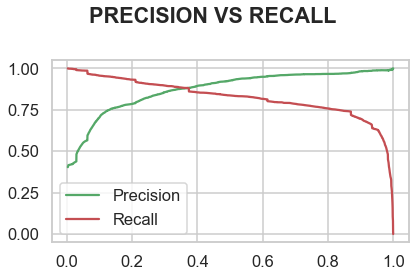

In [87]:
# Passing the values in the function to plot

precision_recall_tradeoff(y_train_pred_final.Converted, y_train_pred_final.Converted_Probability)

___Inferences from the above plot:___

1. Precision value is getting increased after the 0.3 probability and Recall decreases from 1 till 0.8 then decreases abruptly
2. Both the metrics intersect at 0.35 and 0.85 in the plot respectively

Even we have got these values, we can verify the same model using the more visualized way ROC 

### Plotting the ROC Curve

An ROC is a more visual way to measure the performance of a binary classifier is the receiver operating characteristic (ROC) curve and it demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [88]:
# Defining function to use it for mutiple times

def draw_roc( actual, probability ):
    # Passing the actual and predicted value in roc
    fpr, tpr, thresholds = metrics.roc_curve(actual, probability,drop_intermediate = False )
    
    # Passing the actual and predicted value in auc
    auc_score = metrics.roc_auc_score( actual, probability )
    
    
    plt.figure(figsize=(10, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess line')
    plt.xlim([-0.1, 1.1])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate'.upper())
    plt.ylabel('True Positive Rate'.upper())
    plt.suptitle('Receiver operating characteristic curve'.upper(),weight="bold")
    plt.legend(loc=0)
    plt.show()

    return None

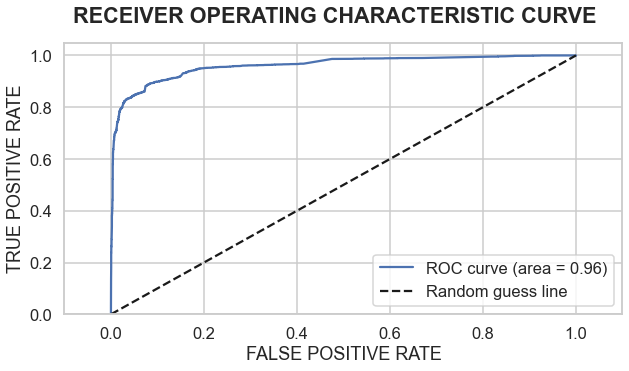

In [89]:
# Passing the values in the function to plot

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Probability)

___Inferences from the above plot:___

The curve corresponds to values of the threshold between 0 and 1, from the top-right to the bottom-left.  
As we see, the curve approaches the corner of the plot where the TPR is 1 and the FP rate is 0 , no non-converted are classified as converted and vice versa. This is the __point of perfect classification__.  

If our points in the random guess line, that means the model performance is terrible.  
The concept suggests that the area under the ROC curve is a good measure of the performance of the algorithm.  
___The Area under value approaches 1 greater than 0.5, so the Model built is good___


### Finding Optimal Cutoff Point

Optimal cutoff probability is the probability where we get balanced sensitivity and specificity

In [90]:
# Let's create columns with different probability cutoffs to check which cutoff is better
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Probability.map(lambda x: 1 if x > i else 0)
    
    
y_train_pred_final.head()

,Prospect_ID,Lead_Number,Converted,Converted_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737.0,0,0.051731,0,1,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728.0,0,0.081900,0,1,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727.0,0,0.017255,0,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719.0,1,0.686221,1,1,1,1,1,1,1,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681.0,1,0.999544,1,1,1,1,1,1,1,1,1,1,1


In [91]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs

cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

# Adding the cutoffs
cutoffs = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

# Looping and finding all the metrics and adding into one
for i in cutoffs:
    confusion_matrix1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(confusion_matrix1))
    accuracy = (confusion_matrix1[0,0]+confusion_matrix1[1,1])/total1
    specificity = confusion_matrix1[0,0]/(confusion_matrix1[0,0]+confusion_matrix1[0,1])
    sensitivity = confusion_matrix1[1,1]/(confusion_matrix1[1,0]+confusion_matrix1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,specificity,sensitivity]
    
cutoff_df

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.385136,0.000000,1.000000
0.1,0.1,0.828688,0.748784,0.956255
0.2,0.2,0.876083,0.840717,0.932543
0.3,0.3,0.902378,0.906018,0.896566
0.4,0.4,0.905369,0.936748,0.855274
0.5,0.5,0.911353,0.958003,0.836877
0.6,0.6,0.912612,0.972855,0.816435
0.7,0.7,0.905842,0.981050,0.785773
0.8,0.8,0.897024,0.983611,0.758790
0.9,0.9,0.877972,0.992061,0.695830


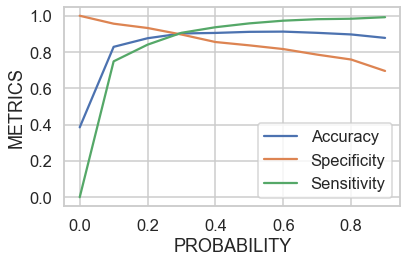

In [92]:
# Let's plot the above DF and see

cutoff_df.plot.line(x='Probability', y=['Accuracy','Specificity','Sensitivity'])
plt.xlabel("Probability".upper())
plt.ylabel("Metrics".upper())
plt.legend(loc=0)

plt.tight_layout()
plt.show()

___Inferences from the above plot:___

1. Sensitivity values starts from 0.0 Probability itself, while the Accuracy starts from 0.4 and increasing too. But Specificity starts from 1.0 and decreasing as the Probability increases
2. The Cutoff-point we have obtained from the above plot is the intersecting point which is ___0.3___

___From the curve above, 0.3 is the optimum point to take it as a cutoff probability___

In [93]:
# Applying the training prediction with the cutoff as 0.3
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Probability.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Probability.map( lambda x: round(x*100))

y_train_pred_final.head()

,Prospect_ID,Lead_Number,Converted,Converted_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Lead_Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737.0,0,0.051731,0,1,0,0,0,0,0,0,0,0,0,0,5
1,2a272436-5132-4136-86fa-dcc88c88f482,660728.0,0,0.081900,0,1,0,0,0,0,0,0,0,0,0,0,8
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727.0,0,0.017255,0,1,0,0,0,0,0,0,0,0,0,0,2
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719.0,1,0.686221,1,1,1,1,1,1,1,1,0,0,0,1,69
4,3256f628-e534-4826-9d63-4a8b88782852,660681.0,1,0.999544,1,1,1,1,1,1,1,1,1,1,1,1,100


In [94]:
# Printing the Confusion Matrix

confusion_matrix2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
print("The Confusion Matrix for the trained prediction is")
print("=="*50)
print(confusion_matrix2)

The Confusion Matrix for the trained prediction is
[[3538  367]
 [ 253 2193]]


In [95]:
# Let's check the overall accuracy

print("The Overall Accuracy of the Model Built is",round(metrics.accuracy_score
                                                         (y_train_pred_final.Converted, y_train_pred_final.Final_Predicted),2)*100)

print("The Overall Misclassification of the Model is ",100-(round(metrics.accuracy_score
                                                         (y_train_pred_final.Converted, y_train_pred_final.Final_Predicted),2)*100))

print("\n")
print("Classification Report")
print("=="*50)
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted))

The Overall Accuracy of the Model Built is 90.0
The Overall Misclassification of the Model is  10.0


Classification Report
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3905
           1       0.86      0.90      0.88      2446

    accuracy                           0.90      6351
   macro avg       0.89      0.90      0.90      6351
weighted avg       0.90      0.90      0.90      6351



The accuracy we obtained from the model built is good, but it cannot be said that the model is good because of the good accuracy score we will determine the other metrics available to understand our model further

In [96]:
# Lets assign the confusion matrix elements with appropriate variable names

TP = confusion_matrix2[1,1] # true positive 
TN = confusion_matrix2[0,0] # true negatives
FP = confusion_matrix2[0,1] # false positives
FN = confusion_matrix2[1,0] # false negatives

# The sensitivity of our logistic regression model
Sensitivity_1 = round(TP / float(TP+FN),2)*100

# The specificity of our logistic regression model
Specificity_1 =round(TN / float(TN+FP),2)*100

# The Precision of our logistic regression model
Precision_1 =round(TP / float(TP+FP),2)*100

# The F1 Score of our logistic regression model
F1_Score_1 =round(metrics.f1_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted),2)*100

# False positive rate 
False_Positive_Rate_1 =round(FP/ float(TN+FP),2)*100

# Positive predictive value 
Positive_Predictive_Rate_1 =round(TP / float(TP+FP),2)*100

# Negative predictive value
Negative_Predictive_Rate_1 =round(TN / float(TN+ FN),2)*100

Precision_sk_2=round(precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted),2)*100
Recall_sk_2=round(recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted),2)*100

print("The Metrics we calculated manually above can be seen here:")
print("=="*50)

print(pd.DataFrame({'Metrics': ['Sensitivity/Recall','Specificity' ,'Precision','F1 Score', 'False Positive Rate'
                          ,'Positive Predictive Rate','Negative Predictive Rate'],
                'Values':[Sensitivity_1,Specificity_1,Precision_1,F1_Score_1,False_Positive_Rate_1
                          ,Positive_Predictive_Rate_1
                          ,Negative_Predictive_Rate_1]}).set_index('Metrics'))
print("\n")

print("The Metrics we calculated using Scikit-learn above can be seen here:")
print("=="*50)

print(pd.DataFrame({'Metrics': ['Sensitivity/Recall','Precision'],
                'Values':[Recall_sk_2,Precision_sk_2]}).set_index('Metrics'))

The Metrics we calculated manually above can be seen here:
                          Values
Metrics                         
Sensitivity/Recall          90.0
Specificity                 91.0
Precision                   86.0
F1 Score                    88.0
False Positive Rate          9.0
Positive Predictive Rate    86.0
Negative Predictive Rate    93.0


The Metrics we calculated using Scikit-learn above can be seen here:
                    Values
Metrics                   
Sensitivity/Recall    90.0
Precision             86.0


__The Metrics we calculated manually above can be seen here__:

|___Metrics___|___Values___|
|---|---|
|___Sensitivity/Recall___|{{Sensitivity_1}}|
|___Specificity___|{{Specificity_1}}|
|___Precision___|{{Precision_1}}|
|___F1 Score___|{{F1_Score_1}}|
|___False Positive Rate___|{{False_Positive_Rate_1}}|
|___Positive Predictive Rate___|{{Positive_Predictive_Rate_1}}|
|___Negative Predictive Rate___|{{Negative_Predictive_Rate_1}}|


__The Metrics we calculated using Scikit  can be seen here__:

|___Metrics___|___Values___|
|---|---|
|___Precision___|{{Precision_sk_2}}|
|___Sensitivity/Recall___|{{Recall_sk_2}}|

## Test Prediction

We will take the test set and apply the columns obtained from the final logistic regression model

In [97]:
# Scaling Transform application to the test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

# Applying the Columns from the RFE
X_test = X_test[columns]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_SMS Sent,What is your current occupation_Not Specified,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given
3271,0.070530,0,0,1,0,0,0,1,0,0,0,0,0
1490,0.679695,0,0,0,0,0,0,0,0,1,0,0,0
7936,0.033243,0,0,1,0,0,0,1,0,0,0,0,0
4216,0.000000,1,0,0,0,1,0,0,0,0,0,0,0
3830,0.073675,0,0,1,0,0,0,1,0,0,0,0,0



We will drop the columns which are dropped in the final model and predict the test set as follows

In [98]:
# Drop the required columns from X_test 
X_test.drop(['Tags_invalid number','Tags_wrong number given','Tags_Not Specified'], 1, inplace = True)

# Predicting the model from the final model
y_test_pred = result.predict(sm.add_constant(X_test))

# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

Prediction has been done and the values are in y_pred_1 variables that has been created as a DF and stored the values in it

In [99]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Leads ID to index
y_test_df['Prospect_ID'] = X_test_index['Prospect ID']
y_test_df['Lead_Number'] = X_test_index['Lead Number']

In [100]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Probability'})

New DF has been created with testing set and concatenated with the predicted value to make the DF perfect

In [101]:
# Applying the lambda function to transfer the 0.3 probability 

y_pred_final['Final_Predicted'] = y_pred_final.Converted_Probability.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final['Lead_Score'] = y_pred_final.Converted_Probability.map( lambda x: round(x*100))
y_pred_final=y_pred_final.reindex(columns=['Prospect_ID','Lead_Number','Converted','Converted_Probability','Final_Predicted','Lead_Score'])

y_pred_final.head()

,Prospect_ID,Lead_Number,Converted,Converted_Probability,Final_Predicted,Lead_Score
0,afc71cc4-67a4-42ae-89f7-779d20c5810d,628652,0,0.036430,0,4
1,a8b4e742-2cce-4280-8549-a4a7d51a0fe2,644500,1,0.985434,1,99
2,774a3b07-491d-4311-ad51-b25cc8cc59ec,588935,0,0.032231,0,3
3,16b63196-0da9-4b2d-974d-21d8f625f5ef,619437,1,0.998161,1,100
4,cbd89429-18cd-47b1-9699-21987bd70a8e,623381,0,0.036807,0,4


In [102]:
# Finding the lead_score above 80

leads_likely_to_converted = y_pred_final[(y_pred_final.Lead_Score>=80)].shape[0]


Finally we will just evaluate the predicted outcome and compare the same with the trained set to understand the model better

In [103]:
# Let's check the overall accuracy

print("The Overall Accuracy of the Model Built is",round(metrics.accuracy_score
                                                         (y_pred_final.Converted, y_pred_final.Final_Predicted),2)*100)

print("The Overall Misclassification of the Model is ",100-(round(metrics.accuracy_score
                                                         (y_pred_final.Converted, y_pred_final.Final_Predicted),2)*100))


print("\n")
print("Classification Report")
print("=="*50)
print(classification_report(y_pred_final.Converted, y_pred_final.Final_Predicted))

The Overall Accuracy of the Model Built is 90.0
The Overall Misclassification of the Model is  10.0


Classification Report
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1734
           1       0.84      0.89      0.86       989

    accuracy                           0.90      2723
   macro avg       0.89      0.89      0.89      2723
weighted avg       0.90      0.90      0.90      2723



In [104]:
# Creating the Confusion matrix

confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )

print("The Confusion matrix for the test prediction")
print("=="*50)
print(confusion_test)

The Confusion matrix for the test prediction
[[1564  170]
 [ 112  877]]


In [105]:
# Lets assign the confusion matrix elements with appropriate variable names

TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

# The sensitivity of our logistic regression model
Sensitivity_test = round(TP / float(TP+FN),2)*100

# The specificity of our logistic regression model
Specificity_test =round(TN / float(TN+FP),2)*100

# The Precision of our logistic regression model
Precision_test =round(TP / float(TP+FP),2)*100

# The F1 Score of our logistic regression model
F1_Score_test =round(metrics.f1_score(y_pred_final.Converted, y_pred_final.Final_Predicted),2)*100

# False positive rate 
False_Positive_Rate_test =round(FP/ float(TN+FP),2)*100

# Positive predictive value 
Positive_Predictive_Rate_test =round(TP / float(TP+FP),2)*100

# Negative predictive value
Negative_Predictive_Rate_test =round(TN / float(TN+ FN),2)*100

# Importing the metrics 
from sklearn.metrics import precision_score, recall_score

Precision_sk_3=round(precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted),2)*100
Recall_sk_3=round(recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted),2)*100

print("The Metrics we calculated manually for the test set above can be seen here:")
print("=="*50)

print(pd.DataFrame({'Metrics': ['Sensitivity/Recall','Specificity' ,'Precision','F1 Score', 'False Positive Rate'
                          ,'Positive Predictive Rate','Negative Predictive Rate'],
                'Values':[Sensitivity_test,Specificity_test,Precision_test,F1_Score_test,False_Positive_Rate_test
                          ,Positive_Predictive_Rate_test
                          ,Negative_Predictive_Rate_test]}).set_index('Metrics'))
print("\n")

print("The Metrics we calculated using Scikit-learn for the test set above can be seen here:")
print("=="*50)

print(pd.DataFrame({'Metrics': ['Sensitivity/Recall','Precision'],
                'Values':[Recall_sk_3,Precision_sk_3]}).set_index('Metrics'))

The Metrics we calculated manually for the test set above can be seen here:
                          Values
Metrics                         
Sensitivity/Recall          89.0
Specificity                 90.0
Precision                   84.0
F1 Score                    86.0
False Positive Rate         10.0
Positive Predictive Rate    84.0
Negative Predictive Rate    93.0


The Metrics we calculated using Scikit-learn for the test set above can be seen here:
                    Values
Metrics                   
Sensitivity/Recall    89.0
Precision             84.0



__The Metrics we calculated for the test set manually above can be seen here__:

|___Metrics___|___Values___|
|---|---|
|___Sensitivity/Recall___|{{Sensitivity_test}}|
|___Specificity___|{{Specificity_test}}|
|___Precision___|{{Precision_test}}|
|___F1 Score___|{{F1_Score_test}}|
|___False Positive Rate___|{{False_Positive_Rate_test}}|
|___Positive Predictive Rate___|{{Positive_Predictive_Rate_test}}|
|___Negative Predictive Rate___|{{Negative_Predictive_Rate_test}}|

__The Metrics we calculated for the test set using Scikit-learn can be seen here__:

|___Metrics___|___Values___|
|---|---|
|___Precision___|{{Precision_sk_3}}|
|___Sensitivity/Recall___|{{Recall_sk_3}}|

In [106]:
print("Comparing the Metrics we calculated manually above can be seen here:")
print("=="*50)

print(pd.DataFrame({'Metrics': ['Sensitivity/Recall','Specificity' ,'Precision','F1 Score', 'False Positive Rate'
                          ,'Positive Predictive Rate','Negative Predictive Rate'],
                    'Trained Values':[Sensitivity,Specificity,Precision,F1_Score,False_Positive_Rate
                          ,Positive_Predictive_Rate
                          ,Negative_Predictive_Rate],
                    'Train Predicted Values':[Sensitivity_1,Specificity_1,Precision_1,F1_Score_1,False_Positive_Rate_1
                          ,Positive_Predictive_Rate_1
                          ,Negative_Predictive_Rate_1],
                'Test Predicted Values':[Sensitivity_test,Specificity_test,Precision_test,F1_Score_test,False_Positive_Rate_test
                          ,Positive_Predictive_Rate_test
                          ,Negative_Predictive_Rate_test]}).set_index('Metrics'))
print("\n")

print("Comparing the Metrics we calculated using Scikit-learn can be seen here:")
print("=="*50)

print(pd.DataFrame({'Metrics': ['Sensitivity/Recall','Precision'],
                    'Trained Values': [Recall_sk_1,Precision_sk_1],
                    'Train Predicted Values':[Recall_sk_2,Precision_sk_2],
                'Values':[Recall_sk_3,Precision_sk_3]}).set_index('Metrics'))

Comparing the Metrics we calculated manually above can be seen here:
                          Trained Values  Train Predicted Values  \
Metrics                                                            
Sensitivity/Recall                  84.0                    90.0   
Specificity                         96.0                    91.0   
Precision                           93.0                    86.0   
F1 Score                            88.0                    88.0   
False Positive Rate                  4.0                     9.0   
Positive Predictive Rate            93.0                    86.0   
Negative Predictive Rate            90.0                    93.0   

                          Test Predicted Values  
Metrics                                          
Sensitivity/Recall                         89.0  
Specificity                                90.0  
Precision                                  84.0  
F1 Score                                   86.0  
False Positive Rat

## Conclusion

__Comparing the Metrics we calculated manually above can be seen here__:

|___Metrics___|___Train Values___|___Train Predicted Values___|___Test Predicted Values___|
|---|---|---|---|
|___Sensitivity/Recall___|{{Sensitivity}}|{{Sensitivity_1}}|{{Sensitivity_test}}|
|___Specificity___|{{Specificity}}|{{Specificity_1}}|{{Specificity_test}}|
|___Precision___|{{Precision}}|{{Precision_1}}|{{Precision_test}}|
|___F1 Score___|{{F1_Score}}|{{F1_Score_1}}|{{F1_Score_test}}|
|___False Positive Rate___|{{False_Positive_Rate}}|{{False_Positive_Rate_1}}|{{False_Positive_Rate_test}}|
|___Positive Predictive Rate___|{{Positive_Predictive_Rate}}|{{Positive_Predictive_Rate_1}}|{{Positive_Predictive_Rate_test}}|
|___Negative Predictive Rate___|{{Negative_Predictive_Rate}}|{{Negative_Predictive_Rate_1}}|{{Negative_Predictive_Rate_test}}|

__Comparing the Metrics we calculated using Scikit-learn can be seen here__:

|___Metrics___|___Train Values___|___Train Predicted Values___|___Test Predicted Values___|
|---|---|---|---|
|___Precision___|{{Precision_sk_1}}|{{Precision_sk_2}}|{{Precision_sk_3}}|
|___Sensitivity/Recall___|{{Recall_sk_1}}|{{Recall_sk_2}}|{{Recall_sk_3}}|


We found that the features variables the most useful in converting the leads :

* ___Total Time Spent on Website___
* ___Last activity___
    * SMS
* ___Lead origin___
    * Lead add format
* ___When their current occupation___
    * Not Specified
* ___Tags___
    * Busy
    * Closed by Horizzon
    * Lost to EINS
    * Ringing
    * Will revert after reading the email
    * switched off
    
    
The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.  
Here , we have got our precision for the final test set is ___more than 80% along with the Lead Score for each leads allows  the company to take decisions___, thus this model is very well used for creating a particular lead to convert the potential and make X Education as a Profitable platform